# **Import liberaries**

In [3]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.2 MB/s eta 0:00:00
 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,summarize)
import itertools
from prophet import Prophet


# **Import dataset**

In [6]:
filepath = '/content/drive/MyDrive/Colab Notebooks/Projects/Personal/Real estate dataset/Real_Estate_Sales_2001-2022_GL.csv'

In [7]:
df = pd.read_csv(filepath)

<ipython-input-7-7248a6640290>:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


In [8]:
df.shape

(1097629, 14)

In [9]:
#df.to_excel("Real_Estate_Sales_2002-2022_GL.xlsx", index=None, header=True)

Serial Number – An identifier for a transaction.

List Year – The year when the property was listed for assessment or sale.

Date Recorded – The date when the sale or assessment information was officially recorded.

Town – The name of the town or municipality where the property is located.

Address – The physical address of the property.

Assessed Value – The value assigned to the property by tax authorities for taxation purposes.

Sale Amount – The actual price at which the property was sold.

Sales Ratio – The ratio of the assessed value to the sale price (used for tax and appraisal analysis).

Property Type – The category of the property (e.g., residential, commercial, industrial, etc.).

Residential Type – If the property is residential, this specifies the type (e.g., single-family home, apartment, etc.).

Non Use Code – A code indicating if the property is not being used for its intended purpose (e.g., vacant land, government-owned).

Assessor Remarks – Comments or additional notes from the property assessor.

OPM Remarks – Remarks from the Office of Policy and Management (OPM), possibly related to tax policies or regulations.

Location – Geographic details or coordinates of the property.

# **Basic insights from the data**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


In [15]:
pd.DataFrame({
    'Count': df.count(),
    'Null': df.isnull().sum(),
    'Cardinality': df.nunique()
})

,Count,Null,Cardinality
Serial Number,1097629,0,96220
List Year,1097629,0,22
Date Recorded,1097627,2,6958
Town,1097629,0,170
Address,1097578,51,771931
Assessed Value,1097629,0,99306
Sale Amount,1097629,0,61075
Sales Ratio,1097629,0,552974
Property Type,715183,382446,11
Residential Type,699240,398389,5


Only these columns do not have missing values  :

* Serial Number / 1097629 non-null / int64  

* List Year / 1097629 non-null / int64

* Town / 1097629 non-null / object

* Assessed Value / 1097629 non-null / float64

* Sale Amount / 1097629 non-null / float64

* Sales Ratio / 1097629 non-null / float64













These columns have few missing values :

* Date Recorded / 1097627 non-null  object : **2 missing values**

* Address / 1097578 non-null / object : **51 missing values**

These columns have a significant amount of missing values :

* Property Type / 715183 non-null / object : **382446 missing values**
* Residential Type / 699240 non-null / object : **398389 missing values**
* Non Use Code / 313451 non-null / object : **313451 missing values**
* Assessor Remarks / 171228 non-null / object : **171228 missing values**
* OPM remarks / 13031 non-null / object : **13031 missing values**
* Location / 298111 non-null / object : **298111 missing values**

In [16]:
print('Number of duplicated rows :',df.duplicated().sum())

Number of duplicated rows : 0


There is no duplicated columns

In [17]:
non_missing_values_features =  ['Serial Number', 'List Year', 'Town', 'Assessed Value', 'Sale Amount', 'Sales Ratio']

few_missing_values_features = ['Date Recorded', 'Address']

significant_missing_values_features = ['Property Type', 'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks', 'Location']

# **How should we handle Missing data ?(Don't run, it's too long)**

In [ ]:
df1 = df.copy()

## Non Use Code, Assessor Remarks and OPM remarks

The columns 'Non Use Code', 'Assessor Remarks' and 'OPM remarks' contain a substantial amount of missing values and the study and model will not beneeding these features so it is better to drop these columns.

The column 'Serial number' is irrelevent and does not even differentiate each property. To differentiate between properties we use the 'Adderss' column as it is unique to each property

In [ ]:
df1.shape

(1097629, 14)

In [ ]:
df1.drop(columns=['Non Use Code','Assessor Remarks','OPM remarks'], axis=1, inplace=True)
df1.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location
0,220008,2022,01/30/2023,Andover,618 ROUTE 6,139020.0,232000.0,0.5992,Residential,Single Family,POINT (-72.343628962 41.728431984)
1,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN
2,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN
3,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family,POINT (-72.846365959 41.781677018)
4,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN


## Property Type and Residential Type (Don't run because too long)

In [ ]:
print('The Residential types are :', df1['Residential Type'].dropna().unique())

The Residential types are : ['Single Family' 'Condo' 'Two Family' 'Four Family' 'Three Family']


In [ ]:
print('The Property types are :', df1['Property Type'].dropna().unique())

The Property types are : ['Residential' 'Commercial' 'Vacant Land' 'Apartments' 'Industrial'
 'Public Utility' 'Condo' 'Two Family' 'Three Family' 'Single Family'
 'Four Family']


The first thing to observe is that we have 2 types of properties : Residential and Non-Residential.


*   **Residential properties :** Any property meant for people to live in.

It contains :

**Single Family:** A standalone home designed for one family.

**Two Family:** A building with two separate living units (also called a duplex).

**Three Family**: A building with 3  separate living units.

**Four Family:** A building with 4 separate living units.

**Condo:** A unit in a building or complex where you own your individual unit but share common areas.

*   **Non Residential properties :**

It contains :

**Commercial:** Used for business activities (retail, offices, etc.).

**Vacant Land:** Land without any residential or commercial structure — often undeveloped.

**Industrial:** Used for manufacturing, storage, or distribution (factories, warehouses, etc.).

**Apartments:** Although people live there, it's often classified differently because:

They're usually investment properties or multi-unit rentals, not owned individually like condos or single-family homes.

Often treated differently for zoning, valuation, and taxation.

**Public Utility:** Land/buildings used for infrastructure (e.g., electrical substations, water plants, etc.).


**First** in the column 'Property type' we replace ['Single Family' 'Two Family' 'Condo' 'Four Family' 'Three Family'] by 'Residential' and put them in 'Residential Type'

In [ ]:
residential_mapping = {
    'Single Family': 'Single Family',
    'Two Family': 'Two Family',
    'Three Family': 'Three Family',
    'Four Family': 'Four Family',
    'Condo': 'Condo'
}

df1['Residential Type'] = df1['Property Type'].map(residential_mapping)

df1['Property Type'] = df1['Property Type'].replace(residential_mapping.keys(), 'Residential')


In [ ]:
pd.DataFrame({
    'Count': df1.count(),
    'Null': df1.isnull().sum(),
    'Cardinality': df1.nunique()
})

,Count,Null,Cardinality
Serial Number,1097629,0,96220
List Year,1097629,0,22
Date Recorded,1097627,2,6958
Town,1097629,0,170
Address,1097578,51,771931
Assessed Value,1097629,0,99306
Sale Amount,1097629,0,61075
Sales Ratio,1097629,0,552974
Property Type,715183,382446,6
Residential Type,548176,549453,5


Let's first fill the missing values in the column 'Property Type'

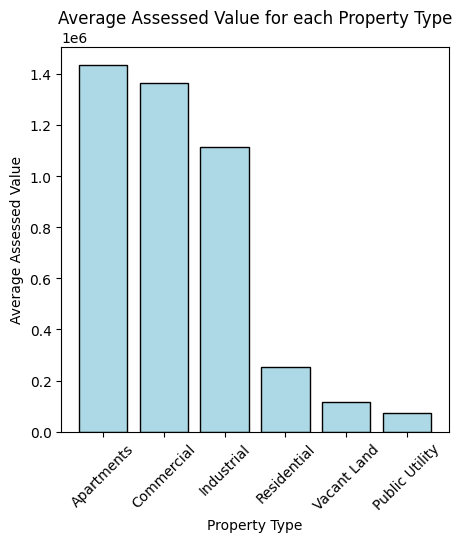

In [ ]:
df_prop_ass = df1.groupby(['Property Type'])['Assessed Value'].mean().reset_index()
df_prop_ass = df_prop_ass.sort_values(by = 'Assessed Value', ascending=False)

fig = plt.figure(figsize=(5,5))

plt.bar(df_prop_ass['Property Type'],df_prop_ass['Assessed Value'], color = 'lightblue', edgecolor='black')
plt.xlabel('Property Type')
plt.xticks(rotation=45)
plt.ylabel('Average Assessed Value')
plt.title('Average Assessed Value for each Property Type')

plt.show()

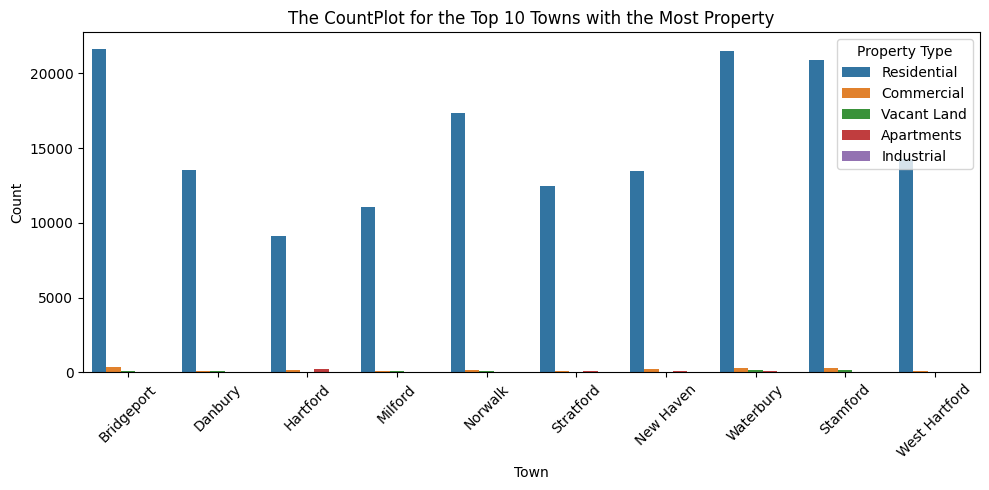

In [ ]:
top10_towns = df['Town'].value_counts().head(10).index
fig = plt.figure(figsize=(10,5))
sns.countplot(x='Town', data=df1[df1['Town'].isin(top10_towns)], hue='Property Type')

plt.title('The CountPlot for the Top 10 Towns with the Most Property')
plt.xlabel('Town')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

In Property Type, the mean Assessed Value of the property types per town will be calculated. The Assessed Value will be compared to those mean values, and the closest mean value property type will be used to fill in the missing values.

In [ ]:
refrence1 = df1.groupby(['Property Type','Town'])['Assessed Value'].mean().reset_index().rename(columns={'Assessed Value': 'Mean Assessed Value'})

missing_df = df1[df1['Property Type'].isnull()].copy()
filled_df = df1[~df1['Property Type'].isnull()].copy()


In [ ]:
def find_closest_prop_type(town, value):
    candidates = refrence1[refrence1['Town'] == town]
    if candidates.empty:
        return np.nan
    closest = (candidates['Mean Assessed Value'] - value).abs().idxmin()
    return candidates.loc[closest, 'Property Type']

In [ ]:
missing_df['Property Type'] = missing_df.apply(
    lambda row: find_closest_prop_type(row['Town'], row['Assessed Value']),
    axis=1
)

df2 = pd.concat([filled_df, missing_df], ignore_index=True)

In [ ]:
print("The number of missing Property Type:", df2['Property Type'].isnull().sum())

The number of missing Property Type: 0


Secondly, let's fill the missing values in the column 'Residential Type', but we know that we only need to fill the missing values where the property type is residential

In [ ]:
df2.shape[0]

1097629

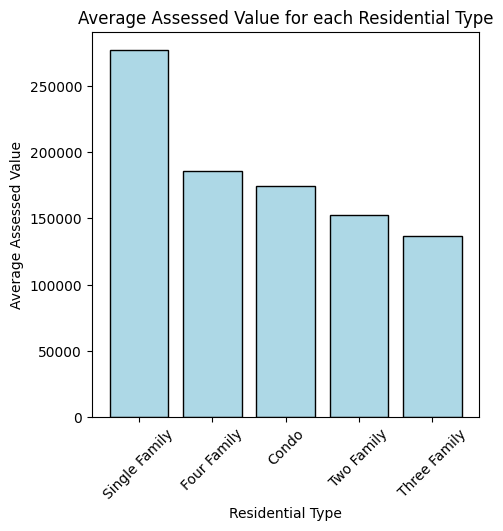

In [ ]:
df_prop_res = df2[df2['Property Type']=='Residential'].groupby(['Residential Type'])['Assessed Value'].mean().reset_index()
df_prop_res = df_prop_res.sort_values(by = 'Assessed Value', ascending=False)

fig = plt.figure(figsize=(5,5))

plt.bar(df_prop_res['Residential Type'],df_prop_res['Assessed Value'], color = 'lightblue', edgecolor='black')
plt.xlabel('Residential Type')
plt.xticks(rotation=45)
plt.ylabel('Average Assessed Value')
plt.title('Average Assessed Value for each Residential Type')

plt.show()

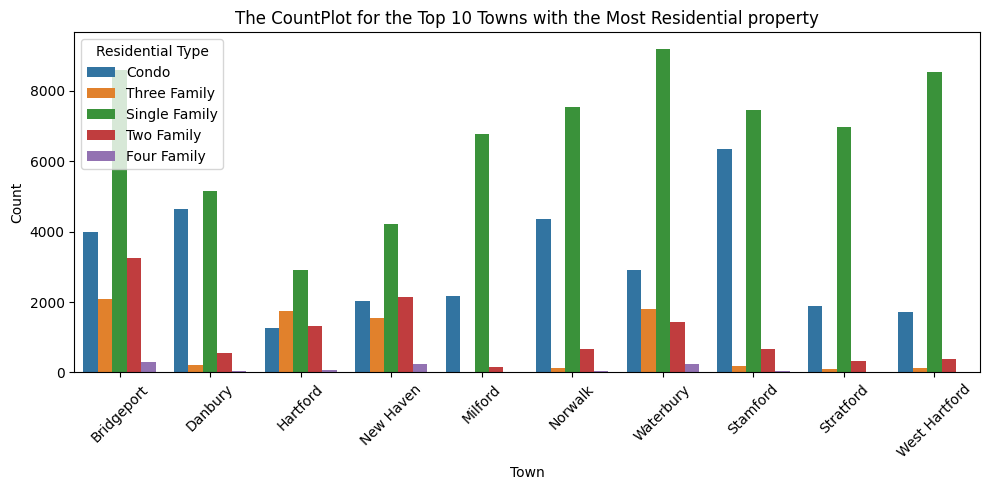

In [ ]:
top10_towns = df2['Town'].value_counts().head(10).index
fig = plt.figure(figsize=(10,5))
sns.countplot(x='Town', data=df2[df2['Town'].isin(top10_towns)], hue='Residential Type')

plt.title('The CountPlot for the Top 10 Towns with the Most Residential property')
plt.xlabel('Town')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
refrence2 = df2.groupby(['Residential Type','Town'])['Assessed Value'].mean().reset_index().rename(columns={'Assessed Value': 'Mean Assessed Value'})
missing_df1 = df2[df2['Residential Type'].isnull()].copy()
filled_df1 = df2[~df2['Residential Type'].isnull()].copy()

In [ ]:
refrence2

,Residential Type,Town,Mean Assessed Value
0,Condo,Ansonia,109083.590361
1,Condo,Ashford,41580.000000
2,Condo,Avon,191328.011745
3,Condo,Beacon Falls,147419.314381
4,Condo,Berlin,414452.030464
...,...,...,...
711,Two Family,Windsor Locks,128755.064935
712,Two Family,Wolcott,179531.600000
713,Two Family,Woodbridge,168742.258065
714,Two Family,Woodbury,262642.307692


In [ ]:
missing_df1.shape[0]+filled_df1.shape[0]

1097629

In [ ]:
def find_closest_res_type(town, value):
    candidates = refrence2[refrence2['Town'] == town]
    if candidates.empty:
        return np.nan
    closest = (candidates['Mean Assessed Value'] - value).abs().idxmin()
    return candidates.loc[closest, 'Residential Type']

In [ ]:
missing_df1['Residential Type'] = missing_df1.apply(
    lambda row: find_closest_res_type(row['Town'], row['Assessed Value']),
    axis=1
)

In [ ]:
df3 = pd.concat([filled_df1, missing_df1], ignore_index=True)

In [ ]:
df3.loc[df3['Property Type']!='Residential','Residential Type']='Non Residential'

In [ ]:
print("The number of missing Residential Type:", df3['Residential Type'].isnull().sum())

The number of missing Residential Type: 0


In [ ]:
print("The number of non residential properties:",df3[df3['Property Type']!='Residential'].shape[0])

The number of non residential properties: 264027


In [ ]:
print("The number of non residential properties:",df3[df3['Residential Type']=='Non Residential'].shape[0])

The number of non residential properties: 264027


In [ ]:
print("The number of  residential properties:",df3[df3['Property Type']=='Residential'].shape[0])

The number of  residential properties: 833602


In [ ]:
df3.shape[0]

1097629

In [ ]:
df3.to_csv('data.csv')

## Date Recorded and Address

In [ ]:
filepath = '/content/drive/MyDrive/Colab Notebooks/Projects/Personal/Real estate dataset/data.csv'

In [ ]:
data = pd.read_csv(filepath)

In [ ]:
data = data.drop(columns='Unnamed: 0')

In [ ]:
data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location
0,60228,2006,07/05/2007,Bethel,10 HUNTINGTON COURT,120960.0,250000.0,0.483840,Residential,Condo,NaN
1,60075,2006,04/05/2007,Essex,7 PRATT ST,143400.0,339500.0,0.422386,Residential,Condo,NaN
2,60416,2006,05/25/2007,Newington,29 STERLING DR,221970.0,340000.0,0.652853,Residential,Condo,NaN
3,60537,2006,08/31/2007,Branford,91 JEFFERSON WOODS,118800.0,210000.0,0.565714,Residential,Condo,NaN
4,60421,2006,05/08/2007,Glastonbury,9 BOXWOOD LN,84000.0,174000.0,0.482759,Residential,Condo,NaN


In [ ]:
data.shape

(1097629, 11)

In [ ]:
data['Date Recorded'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1097629 entries, 0 to 1097628
Series name: Date Recorded
Non-Null Count    Dtype 
--------------    ----- 
1097627 non-null  object
dtypes: object(1)
memory usage: 8.4+ MB


In [ ]:
print(data['Date Recorded'].isnull().sum())

2


We only have 2 missing values

In [ ]:
data[data['Date Recorded'].isnull()]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location
826133,20280,2002,NaN,Orange,NaN,0.0,0.0,0.0,Vacant Land,Non Residential,NaN
827626,0,2002,NaN,Orange,NaN,0.0,0.0,0.0,Vacant Land,Non Residential,NaN


In [ ]:
data[data['Address'].isnull()]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location
11699,60474,2006,07/30/2007,Farmington,NaN,0.0,453369.0,0.000000,Residential,Single Family,NaN
423711,170165,2017,12/08/2017,Manchester,NaN,129300.0,224000.0,0.577200,Residential,Two Family,NaN
450631,172767,2017,01/12/2018,Shelton,NaN,227500.0,500000.0,0.455000,Residential,Condo,NaN
454132,17001,2017,10/02/2017,North Haven,NaN,193130.0,242000.0,0.798000,Residential,Single Family,NaN
715440,39999,2003,02/02/2004,West Haven,NaN,0.0,0.0,0.000000,Vacant Land,Non Residential,NaN
715476,49996,2004,05/17/2005,Lisbon,NaN,0.0,0.0,0.000000,Vacant Land,Non Residential,NaN
715502,48886,2004,06/13/2005,Lisbon,NaN,0.0,0.0,0.000000,Vacant Land,Non Residential,NaN
737239,10537,2001,02/05/2002,Hartford,NaN,0.0,120000.0,0.000000,Vacant Land,Non Residential,NaN
740908,10640,2001,12/19/2001,Bridgeport,NaN,2106020.0,45000.0,46.800444,Commercial,Non Residential,NaN
826133,20280,2002,NaN,Orange,NaN,0.0,0.0,0.000000,Vacant Land,Non Residential,NaN


We can see that the properties that don't include the address are not interesting in our repeated sales method since Address is ou identifier of a unique property. So we should drop the rows with the missing values in 'Address' Column.

The 2 missing values of Date Recorded are on that category.

In [ ]:
data2 = data[~data['Address'].isnull()].copy()

In [ ]:
data2.shape

(1097578, 11)

In [ ]:
data2['Date Recorded'] = pd.to_datetime(data2['Date Recorded'])

In [ ]:
data2['Date Recorded'].info()

<class 'pandas.core.series.Series'>
Index: 1097578 entries, 0 to 1097628
Series name: Date Recorded
Non-Null Count    Dtype         
--------------    -----         
1097578 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 16.7 MB


## Location

In [ ]:
pd.DataFrame({
    'Count': data2.count(),
    'Null': data2.isnull().sum(),
    'Cardinality': data2.nunique()
})

,Count,Null,Cardinality
Serial Number,1097578,0,96217
List Year,1097578,0,22
Date Recorded,1097578,0,6958
Town,1097578,0,170
Address,1097578,0,771931
Assessed Value,1097578,0,99306
Sale Amount,1097578,0,61072
Sales Ratio,1097578,0,552966
Property Type,1097578,0,6
Residential Type,1097578,0,6


In [ ]:
data2.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location
0,60228,2006,2007-07-05,Bethel,10 HUNTINGTON COURT,120960.0,250000.0,0.483840,Residential,Condo,NaN
1,60075,2006,2007-04-05,Essex,7 PRATT ST,143400.0,339500.0,0.422386,Residential,Condo,NaN
2,60416,2006,2007-05-25,Newington,29 STERLING DR,221970.0,340000.0,0.652853,Residential,Condo,NaN
3,60537,2006,2007-08-31,Branford,91 JEFFERSON WOODS,118800.0,210000.0,0.565714,Residential,Condo,NaN
4,60421,2006,2007-05-08,Glastonbury,9 BOXWOOD LN,84000.0,174000.0,0.482759,Residential,Condo,NaN


In [ ]:
data2['Town'].unique()

array(['Bethel', 'Essex', 'Newington', 'Branford', 'Glastonbury',
       'Ledyard', 'Danbury', 'Marlborough', 'Cromwell', 'Bristol',
       'Fairfield', 'Norwalk', 'Woodbury', 'Simsbury', 'Wallingford',
       'Watertown', 'Norwich', 'Stonington', 'Avon', 'Canton', 'Meriden',
       'Milford', 'New Haven', 'Sharon', 'Darien', 'Derby', 'Rocky Hill',
       'Greenwich', 'Enfield', 'Thompson', 'Groton', 'Westport', 'Vernon',
       'Windsor', 'East Haven', 'Trumbull', 'Southington', 'Clinton',
       'South Windsor', 'Suffield', 'Shelton', 'Farmington', 'Hartford',
       'Hamden', 'Southbury', 'Granby', 'Bridgeport', 'Monroe',
       'Guilford', 'Litchfield', 'Winchester', 'Waterbury', 'Woodstock',
       'Stratford', 'Berlin', 'Ellington', 'Bloomfield', 'Colchester',
       'New London', 'East Lyme', 'Somers', 'Wethersfield', 'Salem',
       'Manchester', 'Putnam', 'New Canaan', 'Wilton', 'Stamford',
       'Madison', 'Thomaston', 'Torrington', 'Plainville', 'Killingly',
       'Seymour

In [ ]:
data2[data2['Town']=="***Unknown***"]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location
42710,70086,2007,2007-12-18,***Unknown***,18 MATHIEU LANE,66540.0,282450.0,0.235582,Residential,Single Family,NaN


In [ ]:
data2[data2['Address']=='18 MATHIEU LANE']

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location
42710,70086,2007,2007-12-18,***Unknown***,18 MATHIEU LANE,66540.0,282450.0,0.235582,Residential,Single Family,NaN
42880,70086,2007,2007-12-18,East Hampton,18 MATHIEU LANE,66540.0,282450.0,0.235582,Residential,Single Family,NaN
1054061,70085,2007,2007-12-18,East Hampton,18 MATHIEU LANE,66540.0,50000.0,1.330800,Vacant Land,Non Residential,NaN


In [ ]:
data2 = data2[data2['Town']!='***Unknown***']

In [ ]:
#!pip install geopy

In [ ]:
from geopy.geocoders import Nominatim

loc = Nominatim(user_agent="Geopy Library")

getLoc = loc.geocode("LOT 2 DINGS RD New Hartford, CT, USA")

print(getLoc.address)

print("Latitude = ", getLoc.latitude, "\n")
print("Longitude = ", getLoc.longitude)

Dings Road, Bakerville, New Hartford, Northwest Hills Planning Region, Connecticut, 06057, United States
Latitude =  41.836973044198125 

Longitude =  -73.01522052995116


In [ ]:
data2

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location
0,60228,2006,2007-07-05,Bethel,10 HUNTINGTON COURT,120960.0,250000.0,0.483840,Residential,Condo,NaN
1,60075,2006,2007-04-05,Essex,7 PRATT ST,143400.0,339500.0,0.422386,Residential,Condo,NaN
2,60416,2006,2007-05-25,Newington,29 STERLING DR,221970.0,340000.0,0.652853,Residential,Condo,NaN
3,60537,2006,2007-08-31,Branford,91 JEFFERSON WOODS,118800.0,210000.0,0.565714,Residential,Condo,NaN
4,60421,2006,2007-05-08,Glastonbury,9 BOXWOOD LN,84000.0,174000.0,0.482759,Residential,Condo,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1097624,19150,2019,2020-01-13,Newtown,22 WASHINGTON AVENUE,53640.0,122500.0,0.437900,Vacant Land,Non Residential,NaN
1097625,190242,2019,2020-09-18,Weston,OLD HYDE ROAD,181440.0,150000.0,1.209600,Vacant Land,Non Residential,NaN
1097626,19000067,2019,2020-05-19,New Hartford,LOT 2 DINGS RD,87955.0,35000.0,2.513000,Vacant Land,Non Residential,POINT (-73.02432 41.83788)
1097627,190713,2019,2020-06-01,New Haven,1083 WHALLEY AV,262220.0,325000.0,0.806800,Residential,Four Family,POINT (-72.96622 41.32883)


In [ ]:
address = data2.loc[0,"Address"] +" "+data2.loc[0,'Town']
f"{address}, CT, USA"

'10 HUNTINGTON COURT Bethel, CT, USA'

In [ ]:
data3 = data2.copy()

In [ ]:
#from geopy.geocoders import Nominatim
#from geopy.exc import GeocoderTimedOut, GeocoderUnavailable
#import numpy as np
#import pandas as pd
#import time

#geolocator = Nominatim(user_agent="your_app_name")


#I = []
#for i in range(len(data3)):
  # Use .loc for label-based indexing to access 'Location' column for each row
#  if pd.notna(data3.loc[i,'Location']):
#    point_str = data3.loc[i,'Location']
#    coords = point_str.replace("POINT (", "").replace(")", "")
#    longitude, latitude = map(float, coords.split())
#    data3.loc[i, "Latitude"] = latitude
    data3.loc[i, "Longitude"] = longitude
#  else :
#      try:
#          address = data2.loc[i, "Address"] + " " + data2.loc[i, 'Town']
#          location = geolocator.geocode(f"{address}, CT, USA", timeout=10)
#
#          if location is not None:
#              data3.loc[i, "Latitude"] = location.latitude
#              data3.loc[i, "Longitude"] = location.longitude
#          else:
#              I.append(i)
#              print(f"Address not found in {i}: {address}")
#
#      except (GeocoderTimedOut, GeocoderUnavailable) as e:
#          print(f"Geocoding error for index {i}: {e}")

Address not found in 3: 91 JEFFERSON WOODS Branford
Address not found in 5: 120 GALLUP HL RD 1D Ledyard
Address not found in 6: 163 SOUTH ST UT 1 Danbury
Address not found in 11: 279 REDSTONE HL RD UT63B Bristol
Address not found in 14: 7 UPPER CMNS Woodbury
Address not found in 22: 245 CHERRY AVE UT C11 Watertown
Address not found in 24: 2 FROST ST 4 Norwalk
Address not found in 25: 1 WEST ST UT 118 Simsbury
Address not found in 26: 97 HILLTOP DR Simsbury
Address not found in 30: 14 BAYPATH WAY Branford
Address not found in 34: 61 LA MIRAGE Meriden
Address not found in 36: 32 ABERDEEN RD Fairfield
Address not found in 38: 8 HUGHES PL #2E New Haven
Address not found in 39: 4 UPPER MAIN ST #1 Sharon
Address not found in 41: 121 ORANGEWOOD EAST Derby
Address not found in 46: 2202 HARBOUR VIEW DR Rocky Hill
Address not found in 49: 52 LAFAYETTE PL #1I Greenwich
Address not found in 50: 142 MAIN ST #4 Norwalk


This seems a good idea but it takes too mach time and not all addresses are recognizable

Maybe we should drop the 'Location' since it is not used in our model.

In [ ]:
data3.drop(columns='Location',inplace=True)

In [ ]:
data3.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,60228,2006,2007-07-05,Bethel,10 HUNTINGTON COURT,120960.0,250000.0,0.483840,Residential,Condo
1,60075,2006,2007-04-05,Essex,7 PRATT ST,143400.0,339500.0,0.422386,Residential,Condo
2,60416,2006,2007-05-25,Newington,29 STERLING DR,221970.0,340000.0,0.652853,Residential,Condo
3,60537,2006,2007-08-31,Branford,91 JEFFERSON WOODS,118800.0,210000.0,0.565714,Residential,Condo
4,60421,2006,2007-05-08,Glastonbury,9 BOXWOOD LN,84000.0,174000.0,0.482759,Residential,Condo


In [ ]:
data3.shape

(1097577, 10)

# **Outlier Detection(Don't run, it's too long)**

In [ ]:
#data3.to_csv('cleaned_data.csv')

In [ ]:
filepath = '/content/drive/MyDrive/Colab Notebooks/Projects/Personal/Real estate dataset/cleaned_data.csv'

In [ ]:
data4 = pd.read_csv(filepath)
data4.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
data4.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,60228,2006,2007-07-05,Bethel,10 HUNTINGTON COURT,120960.0,250000.0,0.483840,Residential,Condo
1,60075,2006,2007-04-05,Essex,7 PRATT ST,143400.0,339500.0,0.422386,Residential,Condo
2,60416,2006,2007-05-25,Newington,29 STERLING DR,221970.0,340000.0,0.652853,Residential,Condo
3,60537,2006,2007-08-31,Branford,91 JEFFERSON WOODS,118800.0,210000.0,0.565714,Residential,Condo
4,60421,2006,2007-05-08,Glastonbury,9 BOXWOOD LN,84000.0,174000.0,0.482759,Residential,Condo


In [ ]:
data4.shape

(1097577, 10)

**Are there outliers in Sale Amount or Assessed Value, and how should they be handled?**

The extreme values of Assessed Value and Sale Amount are rejected on the basis of the Box Plot method, to reduce their impact.


Data are considered outliers if their value is outside of this interval:

**[Assessed Value ± 1.5 * (Q3-Q1)]**
with **Qi is the ith quartile Assessed Value.**

**[Sale Amount ± 1.5 * (Q3-Q1)]**
with **Qi is the ith quartile Sale Amount.**

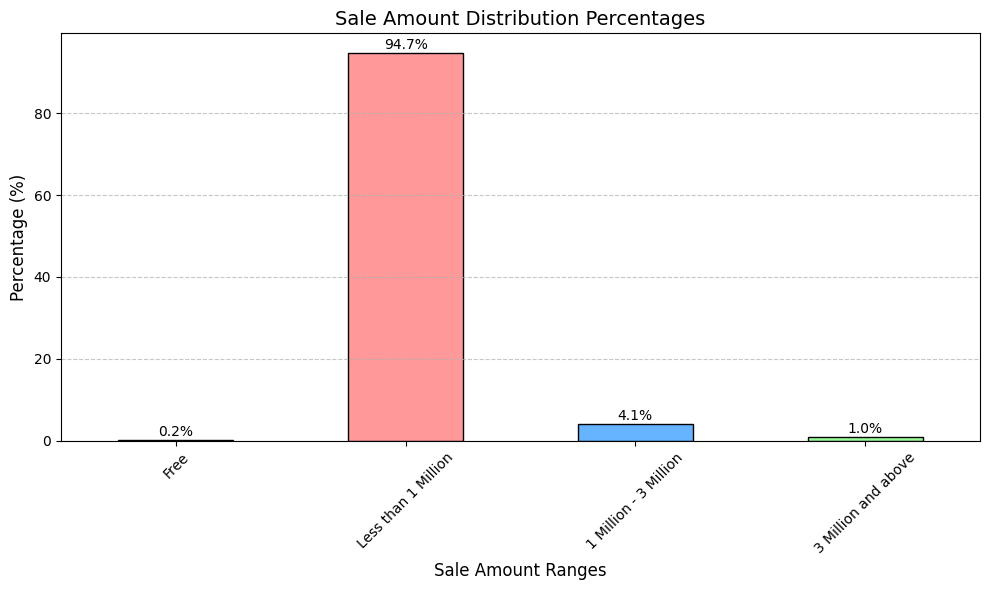

In [ ]:
bins = [0, 1, 1000000, 3000000, float('inf')]
labels = ['Free', 'Less than 1 Million', '1 Million - 3 Million', '3 Million and above']

category_counts = pd.cut(data4['Sale Amount'], bins=bins, labels=labels, right=False).value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
colors = ['#FFCC99', '#FF9999', '#66B3FF', '#99FF99']
category_counts.sort_index().plot(kind='bar', color=colors, edgecolor='black')

plt.title('Sale Amount Distribution Percentages', fontsize=14)
plt.xlabel('Sale Amount Ranges', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(category_counts.sort_index()):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

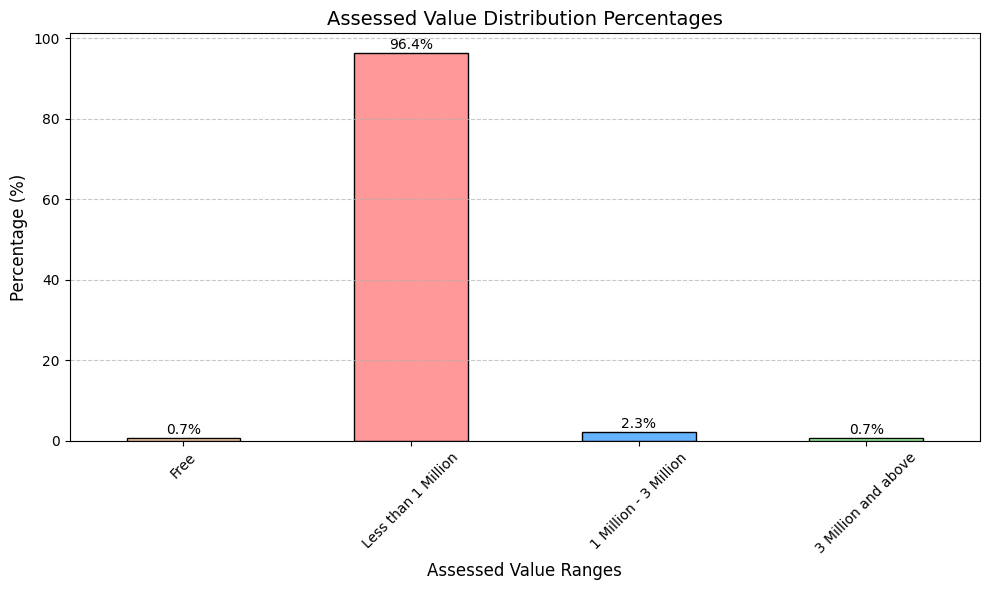

In [ ]:
bins = [0, 1, 1000000, 3000000, float('inf')]
labels = ['Free', 'Less than 1 Million', '1 Million - 3 Million', '3 Million and above']

category_counts = pd.cut(data4['Assessed Value'], bins=bins, labels=labels, right=False).value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
colors = ['#FFCC99', '#FF9999', '#66B3FF', '#99FF99']
category_counts.sort_index().plot(kind='bar', color=colors, edgecolor='black')

plt.title('Assessed Value Distribution Percentages', fontsize=14)
plt.xlabel('Assessed Value Ranges', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(category_counts.sort_index()):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

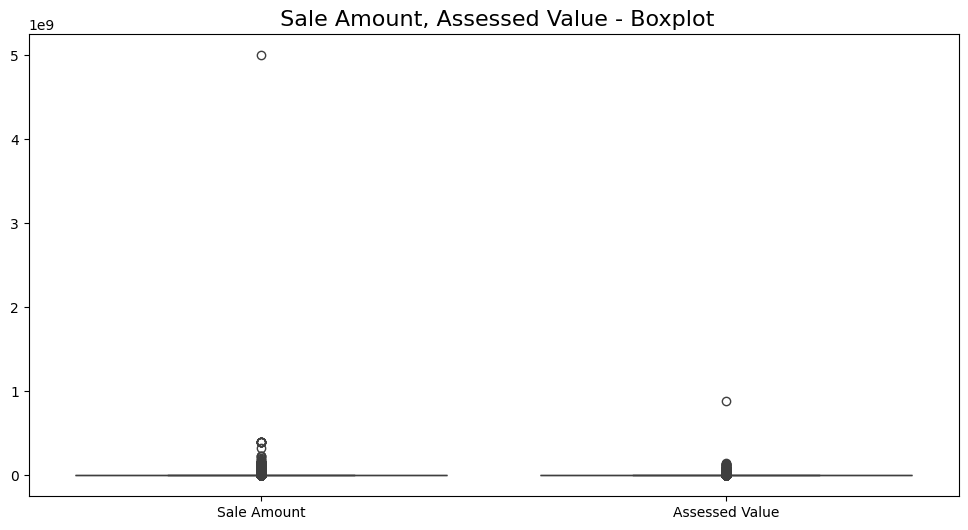

In [ ]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=data4[['Sale Amount', 'Assessed Value']])

plt.title(" Sale Amount, Assessed Value - Boxplot", fontsize=16)

plt.show()

In [ ]:
print(data4[['Sale Amount', 'Assessed Value']].describe())

        Sale Amount  Assessed Value
count  1.097577e+06    1.097577e+06
mean   4.053210e+05    2.818112e+05
std    5.143610e+06    1.657928e+06
min    0.000000e+00    0.000000e+00
25%    1.450000e+05    8.910000e+04
50%    2.330000e+05    1.405900e+05
75%    3.750000e+05    2.282700e+05
max    5.000000e+09    8.815100e+08


In [ ]:
data4['Sale_Amount_log'] = np.log1p(data4['Sale Amount'])
data4['Assessed_Value_log'] = np.log1p(data4['Assessed Value'])

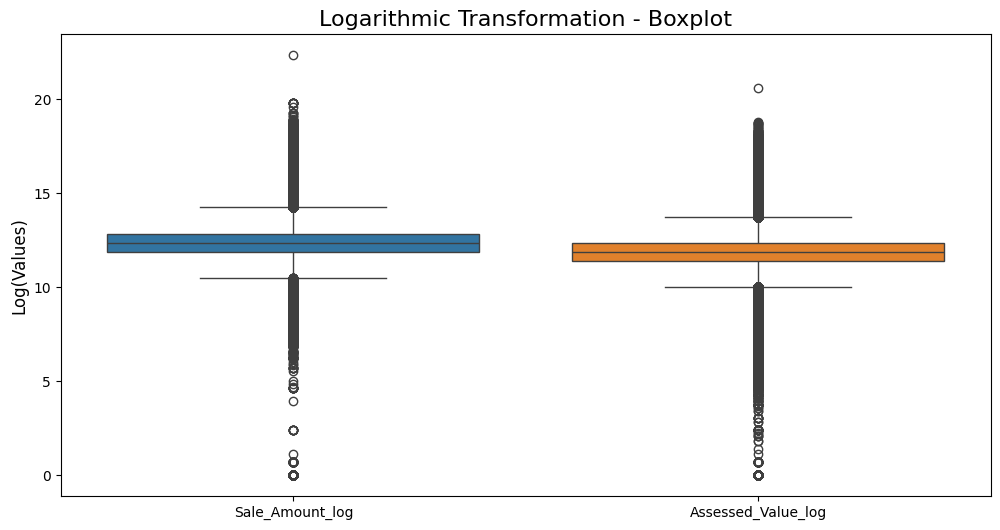

In [ ]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=data4[['Sale_Amount_log', 'Assessed_Value_log']])

plt.title("Logarithmic Transformation - Boxplot", fontsize=16)
plt.ylabel("Log(Values)", fontsize=12)
plt.show()

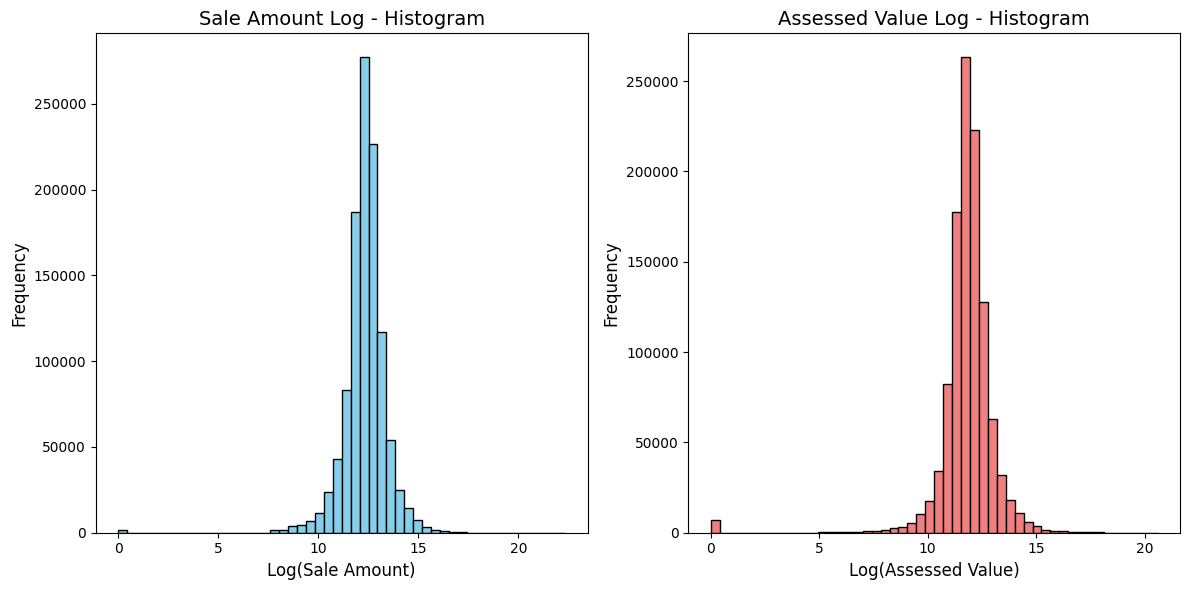

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data4['Sale_Amount_log'], bins=50, color='skyblue', edgecolor='black')
plt.title("Sale Amount Log - Histogram", fontsize=14)
plt.xlabel("Log(Sale Amount)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.subplot(1, 2, 2)
plt.hist(data4['Assessed_Value_log'], bins=50, color='lightcoral', edgecolor='black')
plt.title("Assessed Value Log - Histogram", fontsize=14)
plt.xlabel("Log(Assessed Value)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
log_summary = data4[['Sale_Amount_log', 'Assessed_Value_log']].describe()
print(log_summary)

       Sale_Amount_log  Assessed_Value_log
count     1.097577e+06        1.097577e+06
mean      1.231591e+01        1.180245e+01
std       1.093597e+00        1.363672e+00
min       0.000000e+00        0.000000e+00
25%       1.188450e+01        1.139753e+01
50%       1.235880e+01        1.185361e+01
75%       1.283468e+01        1.233829e+01
max       2.233270e+01        2.059715e+01


We should take out the outliers

Since our model is going to fit a linear regression on the logarithmic Sale amount(or Assessed value) as the response variable. We will also take out the ouliers on these variables.

In [ ]:
Q1 = data4[['Sale_Amount_log', 'Assessed_Value_log']].quantile(0.25)
Q3 = data4[['Sale_Amount_log', 'Assessed_Value_log']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound = lower_bound.reindex(data4[['Sale_Amount_log', 'Assessed_Value_log']].columns)
upper_bound = upper_bound.reindex(data4[['Sale_Amount_log', 'Assessed_Value_log']].columns)

outliers = (data4[['Sale_Amount_log', 'Assessed_Value_log']] < lower_bound) | (data4[['Sale_Amount_log', 'Assessed_Value_log']] > upper_bound)


print("Number of Outliers - Sale Amount:", outliers['Sale_Amount_log'].sum())
print("Number of Outliers - Assessed Value:", outliers['Assessed_Value_log'].sum())

Number of Outliers - Sale Amount: 69115
Number of Outliers - Assessed Value: 73166


In [ ]:
data5 = data4[~outliers.any(axis=1)].copy()

In [ ]:
data5

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Sale_Amount_log,Assessed_Value_log
0,60228,2006,2007-07-05,Bethel,10 HUNTINGTON COURT,120960.0,250000.0,0.483840,Residential,Condo,12.429220,11.703223
1,60075,2006,2007-04-05,Essex,7 PRATT ST,143400.0,339500.0,0.422386,Residential,Condo,12.735232,11.873400
2,60416,2006,2007-05-25,Newington,29 STERLING DR,221970.0,340000.0,0.652853,Residential,Condo,12.736704,12.310302
3,60537,2006,2007-08-31,Branford,91 JEFFERSON WOODS,118800.0,210000.0,0.565714,Residential,Condo,12.254868,11.685205
4,60421,2006,2007-05-08,Glastonbury,9 BOXWOOD LN,84000.0,174000.0,0.482759,Residential,Condo,12.066816,11.338584
...,...,...,...,...,...,...,...,...,...,...,...,...
1097571,190234,2019,2020-07-20,Wilton,481 DANBURY RD,445200.0,410000.0,1.085900,Residential,Two Family,12.923915,13.006281
1097572,19150,2019,2020-01-13,Newtown,22 WASHINGTON AVENUE,53640.0,122500.0,0.437900,Vacant Land,Non Residential,11.715874,10.890069
1097573,190242,2019,2020-09-18,Weston,OLD HYDE ROAD,181440.0,150000.0,1.209600,Vacant Land,Non Residential,11.918397,12.108686
1097574,19000067,2019,2020-05-19,New Hartford,LOT 2 DINGS RD,87955.0,35000.0,2.513000,Vacant Land,Non Residential,10.463132,11.384592


In [ ]:
print(data5[['Sale Amount', 'Assessed Value']].describe())

        Sale Amount  Assessed Value
count  9.951690e+05   995169.000000
mean   2.962926e+05   180995.269787
std    2.244255e+05   136976.331376
min    3.489400e+04    21730.000000
25%    1.520000e+05    94010.000000
50%    2.350000e+05   141610.000000
75%    3.650000e+05   219100.000000
max    1.559320e+06   936000.000000


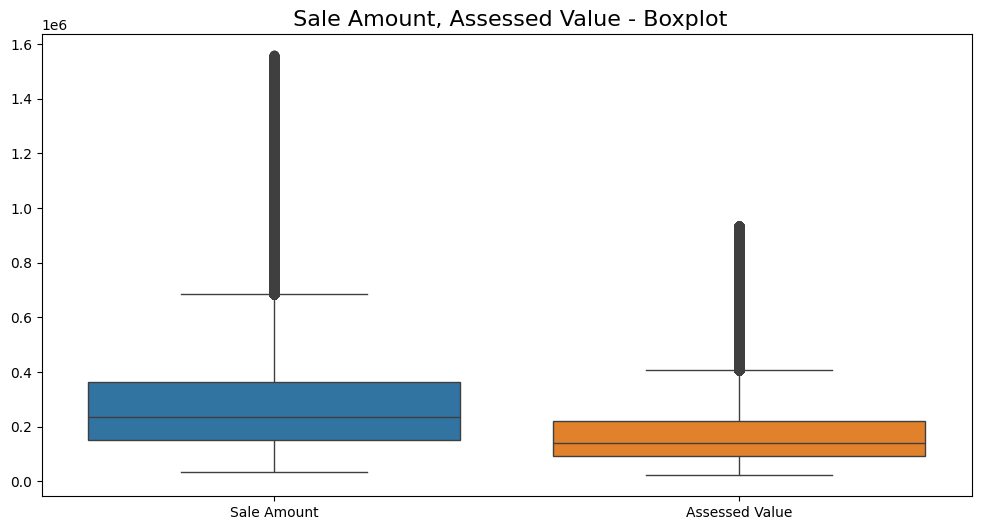

In [ ]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=data5[['Sale Amount', 'Assessed Value']])

plt.title(" Sale Amount, Assessed Value - Boxplot", fontsize=16)

plt.show()

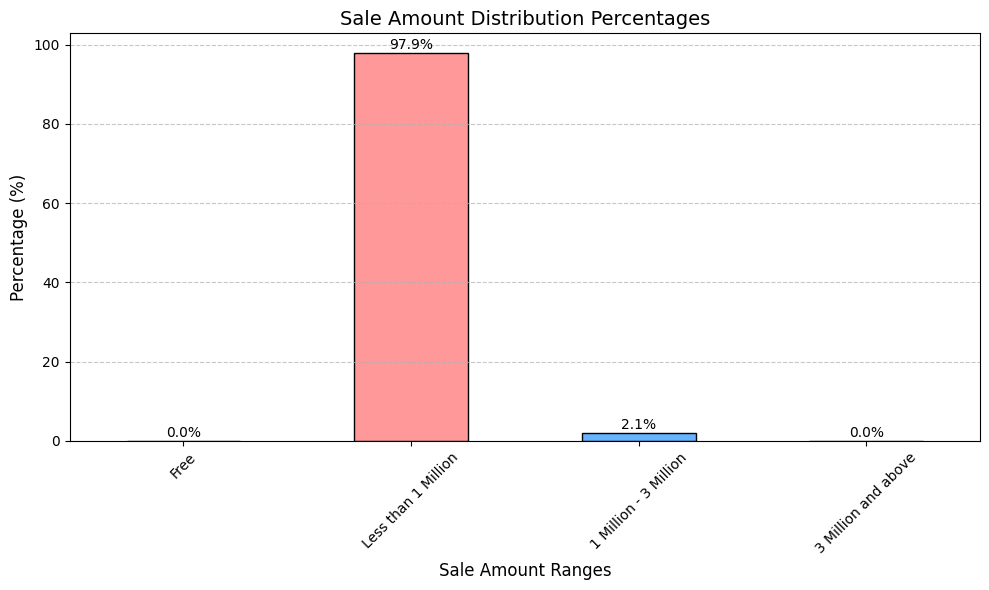

In [ ]:
bins = [0, 1, 1000000, 3000000, float('inf')]
labels = ['Free', 'Less than 1 Million', '1 Million - 3 Million', '3 Million and above']

category_counts = pd.cut(data5['Sale Amount'], bins=bins, labels=labels, right=False).value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
colors = ['#FFCC99', '#FF9999', '#66B3FF', '#99FF99']
category_counts.sort_index().plot(kind='bar', color=colors, edgecolor='black')

plt.title('Sale Amount Distribution Percentages', fontsize=14)
plt.xlabel('Sale Amount Ranges', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(category_counts.sort_index()):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

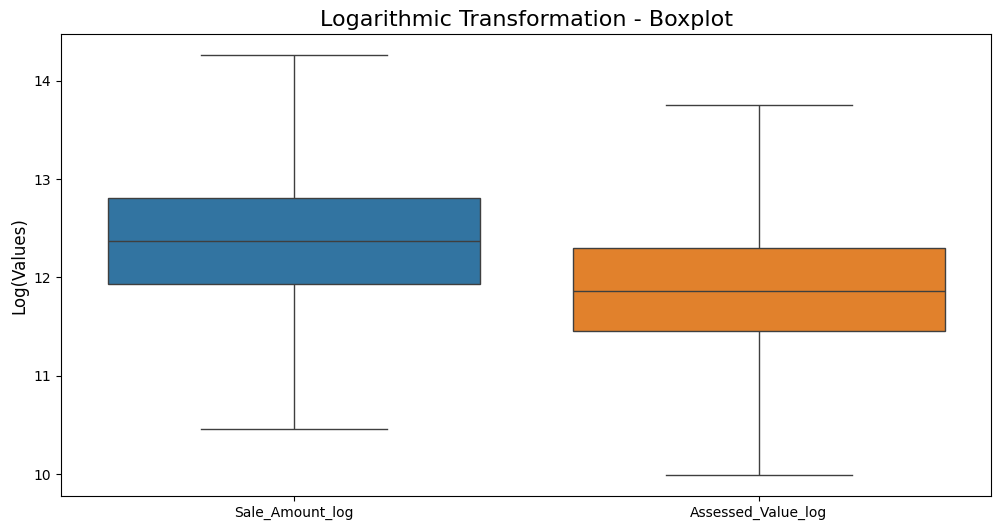

In [ ]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=data5[['Sale_Amount_log', 'Assessed_Value_log']], whis = 3)

plt.title("Logarithmic Transformation - Boxplot", fontsize=16)
plt.ylabel("Log(Values)", fontsize=12)
plt.show()

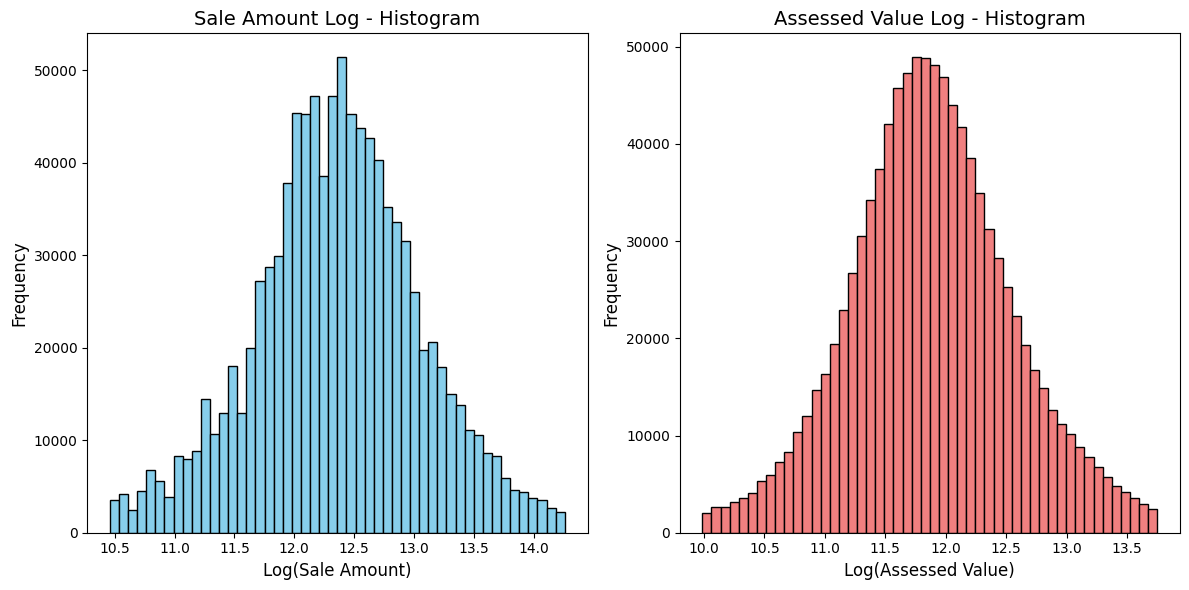

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data5['Sale_Amount_log'], bins=50, color='skyblue', edgecolor='black')
plt.title("Sale Amount Log - Histogram", fontsize=14)
plt.xlabel("Log(Sale Amount)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.subplot(1, 2, 2)
plt.hist(data5['Assessed_Value_log'], bins=50, color='lightcoral', edgecolor='black')
plt.title("Assessed Value Log - Histogram", fontsize=14)
plt.xlabel("Log(Assessed Value)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
log_summary = data5[['Sale_Amount_log', 'Assessed_Value_log']].describe()
print(log_summary)

       Sale_Amount_log  Assessed_Value_log
count    995169.000000       995169.000000
mean         12.363346           11.879414
std           0.690669            0.668185
min          10.460099            9.986495
25%          11.931642           11.451167
50%          12.367345           11.860839
75%          12.807655           12.297288
max          14.259761           13.749372


In [ ]:
data5.to_csv('final_data.csv')

#**Repeat Sales Method**

In [18]:
RSM_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Personal/Real estate dataset/final_data.csv")
RSM_data.drop(columns='Unnamed: 0',inplace=True)

In [19]:
RSM_data

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Sale_Amount_log,Assessed_Value_log
0,60228,2006,2007-07-05,Bethel,10 HUNTINGTON COURT,120960.0,250000.0,0.483840,Residential,Condo,12.429220,11.703223
1,60075,2006,2007-04-05,Essex,7 PRATT ST,143400.0,339500.0,0.422386,Residential,Condo,12.735232,11.873400
2,60416,2006,2007-05-25,Newington,29 STERLING DR,221970.0,340000.0,0.652853,Residential,Condo,12.736704,12.310302
3,60537,2006,2007-08-31,Branford,91 JEFFERSON WOODS,118800.0,210000.0,0.565714,Residential,Condo,12.254868,11.685205
4,60421,2006,2007-05-08,Glastonbury,9 BOXWOOD LN,84000.0,174000.0,0.482759,Residential,Condo,12.066816,11.338584
...,...,...,...,...,...,...,...,...,...,...,...,...
995164,190234,2019,2020-07-20,Wilton,481 DANBURY RD,445200.0,410000.0,1.085900,Residential,Two Family,12.923915,13.006281
995165,19150,2019,2020-01-13,Newtown,22 WASHINGTON AVENUE,53640.0,122500.0,0.437900,Vacant Land,Non Residential,11.715874,10.890069
995166,190242,2019,2020-09-18,Weston,OLD HYDE ROAD,181440.0,150000.0,1.209600,Vacant Land,Non Residential,11.918397,12.108686
995167,19000067,2019,2020-05-19,New Hartford,LOT 2 DINGS RD,87955.0,35000.0,2.513000,Vacant Land,Non Residential,10.463132,11.384592


**Let us add the quarter of the year of each transaction recorded**

We are going to use the 'Date Recorded'

In [20]:
RSM_data['Date Recorded'] = pd.to_datetime(RSM_data['Date Recorded'])
RSM_data['Year'] = RSM_data['Date Recorded'].dt.year

In [21]:
RSM_data.drop(columns='List Year',inplace=True)

In [22]:
RSM_data['Quarter'] = RSM_data['Date Recorded'].dt.quarter

In [23]:
RSM_data

,Serial Number,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Sale_Amount_log,Assessed_Value_log,Year,Quarter
0,60228,2007-07-05,Bethel,10 HUNTINGTON COURT,120960.0,250000.0,0.483840,Residential,Condo,12.429220,11.703223,2007,3
1,60075,2007-04-05,Essex,7 PRATT ST,143400.0,339500.0,0.422386,Residential,Condo,12.735232,11.873400,2007,2
2,60416,2007-05-25,Newington,29 STERLING DR,221970.0,340000.0,0.652853,Residential,Condo,12.736704,12.310302,2007,2
3,60537,2007-08-31,Branford,91 JEFFERSON WOODS,118800.0,210000.0,0.565714,Residential,Condo,12.254868,11.685205,2007,3
4,60421,2007-05-08,Glastonbury,9 BOXWOOD LN,84000.0,174000.0,0.482759,Residential,Condo,12.066816,11.338584,2007,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995164,190234,2020-07-20,Wilton,481 DANBURY RD,445200.0,410000.0,1.085900,Residential,Two Family,12.923915,13.006281,2020,3
995165,19150,2020-01-13,Newtown,22 WASHINGTON AVENUE,53640.0,122500.0,0.437900,Vacant Land,Non Residential,11.715874,10.890069,2020,1
995166,190242,2020-09-18,Weston,OLD HYDE ROAD,181440.0,150000.0,1.209600,Vacant Land,Non Residential,11.918397,12.108686,2020,3
995167,19000067,2020-05-19,New Hartford,LOT 2 DINGS RD,87955.0,35000.0,2.513000,Vacant Land,Non Residential,10.463132,11.384592,2020,2



**Keep only properties sold more than one time**



We will create a new dataset for based on the first and last listing years of repeated addresses.

New data was produced for price changes and repeat sales of real estate over time.

To diffrentiate between each unique property. We will create a new dataset based on the first and last listing years of repeated addresses with the same property and residential type.

In [24]:
duplicate_addresses_prop_res = RSM_data[RSM_data.duplicated(subset=['Address','Property Type','Residential Type'], keep=False)]
property_data = RSM_data[['Address', 'Town','Property Type','Residential Type']].drop_duplicates()

In [25]:
duplicate_addresses_prop_res

,Serial Number,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Sale_Amount_log,Assessed_Value_log,Year,Quarter
0,60228,2007-07-05,Bethel,10 HUNTINGTON COURT,120960.0,250000.0,0.483840,Residential,Condo,12.429220,11.703223,2007,3
4,60421,2007-05-08,Glastonbury,9 BOXWOOD LN,84000.0,174000.0,0.482759,Residential,Condo,12.066816,11.338584,2007,2
7,60082,2007-07-19,Marlborough,11 SACHEM DR,158900.0,255000.0,0.623137,Residential,Condo,12.449023,11.976037,2007,3
9,60327,2007-07-13,Cromwell,8 WATCH HL CIR,97050.0,179900.0,0.539466,Residential,Condo,12.100162,11.482992,2007,3
10,60354,2007-04-23,Newington,41 WEBSTER CT,85750.0,152000.0,0.564145,Residential,Condo,11.931642,11.359203,2007,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995150,190275,2020-08-03,Wilton,42 BORGLUM RD,253050.0,320000.0,0.790800,Vacant Land,Non Residential,12.676079,12.441346,2020,3
995152,190065,2019-12-26,Winchester,135 MAIN ST,89950.0,200000.0,0.449800,Vacant Land,Non Residential,12.206078,11.407020,2019,4
995155,190049,2020-07-02,Roxbury,42 WELTON RD,277200.0,305000.0,0.908900,Commercial,Non Residential,12.628070,12.532498,2020,3
995157,1910383,2020-06-16,Naugatuck,1152 NEW HAVEN RD,104050.0,245000.0,0.424694,Residential,Two Family,12.409018,11.552636,2020,2


In [26]:
first_year_data = duplicate_addresses_prop_res[duplicate_addresses_prop_res['Year'] == duplicate_addresses_prop_res.groupby(['Address','Property Type','Residential Type'])['Year'].transform('min')]
last_year_data = duplicate_addresses_prop_res[duplicate_addresses_prop_res['Year'] == duplicate_addresses_prop_res.groupby(['Address','Property Type','Residential Type'])['Year'].transform('max')]

first_year_data = first_year_data[['Address', 'Year', 'Sale Amount','Sale_Amount_log','Property Type','Residential Type','Quarter']].rename(columns={'Year': 'First Year', 'Sale Amount': 'First_Year_Sale_Amount','Sale_Amount_log':'First_Year_Sale_Amount_log','Property Type':'Property Type','Residential Type':'Residential Type','Quarter':'First_Year_Quarter'})
last_year_data = last_year_data[['Address', 'Year', 'Sale Amount','Sale_Amount_log','Property Type','Residential Type','Quarter']].rename(columns={'Year': 'Last Year', 'Sale Amount': 'Last_Year_Sale_Amount','Sale_Amount_log':'Last_Year_Sale_Amount_log','Property Type':'Property Type','Residential Type':'Residential Type','Quarter':'Last_Year_Quarter'})

merged_data = pd.merge(first_year_data, last_year_data, on=['Address','Property Type','Residential Type'], how='inner')

RSM = merged_data[merged_data['First Year'] != merged_data['Last Year']]

In [27]:
RSM

,Address,First Year,First_Year_Sale_Amount,First_Year_Sale_Amount_log,Property Type,Residential Type,First_Year_Quarter,Last Year,Last_Year_Sale_Amount,Last_Year_Sale_Amount_log,Last_Year_Quarter
0,10 HUNTINGTON COURT,2007,250000.0,12.429220,Residential,Condo,3,2014,140900.0,11.855813,4
1,11 SACHEM DR,2007,255000.0,12.449023,Residential,Condo,3,2023,310000.0,12.644331,3
2,2 MULLIGAN DR,2006,520000.0,13.161586,Residential,Condo,4,2016,480000.0,13.081543,2
3,168 SUMMIT ST,2007,184000.0,12.122696,Residential,Condo,2,2010,147000.0,11.898195,1
4,135 CLIFF ST,2006,110000.0,11.608245,Residential,Two Family,4,2018,47000.0,10.757924,1
...,...,...,...,...,...,...,...,...,...,...,...
218614,155 NELLS ROCK RD,2020,103000.0,11.542494,Vacant Land,Non Residential,3,2021,195000.0,12.180760,3
218619,3 PARK AVE,2020,632385.0,13.357255,Commercial,Non Residential,3,2021,210000.0,12.254868,4
218622,193 MAIN ST,2019,265000.0,12.487489,Residential,Three Family,4,2022,360000.0,12.793862,3
218623,13 WEST ST,2020,175000.0,12.072547,Residential,Condo,2,2021,75000.0,11.225257,1


In [28]:
pd.DataFrame({
    'Count': RSM.count(),
    'Null': RSM.isnull().sum(),
    'Cardinality': RSM.nunique()
})

,Count,Null,Cardinality
Address,124408,0,106445
First Year,124408,0,23
First_Year_Sale_Amount,124408,0,11147
First_Year_Sale_Amount_log,124408,0,11147
Property Type,124408,0,6
Residential Type,124408,0,6
First_Year_Quarter,124408,0,4
Last Year,124408,0,22
Last_Year_Sale_Amount,124408,0,8325
Last_Year_Sale_Amount_log,124408,0,8325


There is only **103795** properties sold more than once from the original **771931** properties (about **13.5%**)

# **Exploratory Data Analysis**

### **It is done in Microsoft Power BI**

# **Calculation method of Price Index : Preparing the training dataset**

For the repeat sales method, only the **price change** and the **number of transactions** are included in the construction of the index.

It creates an **index sensitive to the market dynamics**, taking into account the **time distribution of transactions**.

Thus, each repeated sale (couple of transactions on the same property) is used to calculate a price change.

The index is then constructed on the basis of these individual transactions.




Linear Regresssion Model :
$$
\log\left(\frac{P_{it}}{P_{i\tau}}\right) = \sum_s \beta_s D_{is} + \varepsilon_{i\tau}, \quad s = 1, \ldots, S
$$

With

$$
D_{is} =
\begin{cases}
1 & \text{if } s = t \\
-1 & \text{if } s = \tau, \quad \text{with } t > \tau \\
0 & \text{else}
\end{cases}
$$

---

---

**Where:**

- $P_{i\tau}$: Price of the property at the time $\tau$, date of the first sale  
- $P_{it}$: Price of the same property at the time $t$, date of the second sale  
- $\beta_s$: Coefficient to estimate for the period $s$  
- $\varepsilon_{i\tau}$: Error term  
- $S$: Number of quarters contained in the study period  

---

Where $\tau = t - 1$, price development is assimilated to average price movements on repeat sales observed between $t$ and $t - 1$.

Once estimated, the coefficients $\beta_s$ are used to construct the index on a base of 100 for the quarter $t$:

$$
I_t = 100 \exp(\hat{\beta}_t - \hat{\beta}_\tau)
$$


In [29]:
RSM

,Address,First Year,First_Year_Sale_Amount,First_Year_Sale_Amount_log,Property Type,Residential Type,First_Year_Quarter,Last Year,Last_Year_Sale_Amount,Last_Year_Sale_Amount_log,Last_Year_Quarter
0,10 HUNTINGTON COURT,2007,250000.0,12.429220,Residential,Condo,3,2014,140900.0,11.855813,4
1,11 SACHEM DR,2007,255000.0,12.449023,Residential,Condo,3,2023,310000.0,12.644331,3
2,2 MULLIGAN DR,2006,520000.0,13.161586,Residential,Condo,4,2016,480000.0,13.081543,2
3,168 SUMMIT ST,2007,184000.0,12.122696,Residential,Condo,2,2010,147000.0,11.898195,1
4,135 CLIFF ST,2006,110000.0,11.608245,Residential,Two Family,4,2018,47000.0,10.757924,1
...,...,...,...,...,...,...,...,...,...,...,...
218614,155 NELLS ROCK RD,2020,103000.0,11.542494,Vacant Land,Non Residential,3,2021,195000.0,12.180760,3
218619,3 PARK AVE,2020,632385.0,13.357255,Commercial,Non Residential,3,2021,210000.0,12.254868,4
218622,193 MAIN ST,2019,265000.0,12.487489,Residential,Three Family,4,2022,360000.0,12.793862,3
218623,13 WEST ST,2020,175000.0,12.072547,Residential,Condo,2,2021,75000.0,11.225257,1


In [30]:
RSM_1 = RSM.copy()

In [31]:
RSM_1 = RSM_1.reset_index()

In [32]:
RSM_1.drop(columns='index',inplace=True)

In [33]:
RSM_1

,Address,First Year,First_Year_Sale_Amount,First_Year_Sale_Amount_log,Property Type,Residential Type,First_Year_Quarter,Last Year,Last_Year_Sale_Amount,Last_Year_Sale_Amount_log,Last_Year_Quarter
0,10 HUNTINGTON COURT,2007,250000.0,12.429220,Residential,Condo,3,2014,140900.0,11.855813,4
1,11 SACHEM DR,2007,255000.0,12.449023,Residential,Condo,3,2023,310000.0,12.644331,3
2,2 MULLIGAN DR,2006,520000.0,13.161586,Residential,Condo,4,2016,480000.0,13.081543,2
3,168 SUMMIT ST,2007,184000.0,12.122696,Residential,Condo,2,2010,147000.0,11.898195,1
4,135 CLIFF ST,2006,110000.0,11.608245,Residential,Two Family,4,2018,47000.0,10.757924,1
...,...,...,...,...,...,...,...,...,...,...,...
124403,155 NELLS ROCK RD,2020,103000.0,11.542494,Vacant Land,Non Residential,3,2021,195000.0,12.180760,3
124404,3 PARK AVE,2020,632385.0,13.357255,Commercial,Non Residential,3,2021,210000.0,12.254868,4
124405,193 MAIN ST,2019,265000.0,12.487489,Residential,Three Family,4,2022,360000.0,12.793862,3
124406,13 WEST ST,2020,175000.0,12.072547,Residential,Condo,2,2021,75000.0,11.225257,1


In [34]:
RSM_1['First Year'].unique()

array([2007, 2006, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2017,
       2018, 2019, 2020, 2001, 2004, 2005, 2016, 1999, 2021, 2022, 2002,
       2003], dtype=int32)

In [35]:
RSM_1['Last Year'].unique()

array([2014, 2023, 2016, 2010, 2018, 2020, 2019, 2022, 2017, 2012, 2021,
       2013, 2007, 2015, 2008, 2011, 2009, 2002, 2004, 2003, 2006, 2005],
      dtype=int32)

In [36]:
years = list(map(str,range(2001,2023)))
quarters = ['Q1','Q2','Q3','Q4']

In [37]:
qr_yr_cl = [f"{yr} {q}" for yr, q in itertools.product(years, quarters)]
RSM_1[qr_yr_cl] = 0

In [38]:
RSM_1.head()

,Address,First Year,First_Year_Sale_Amount,First_Year_Sale_Amount_log,Property Type,Residential Type,First_Year_Quarter,Last Year,Last_Year_Sale_Amount,Last_Year_Sale_Amount_log,...,2020 Q3,2020 Q4,2021 Q1,2021 Q2,2021 Q3,2021 Q4,2022 Q1,2022 Q2,2022 Q3,2022 Q4
0,10 HUNTINGTON COURT,2007,250000.0,12.429220,Residential,Condo,3,2014,140900.0,11.855813,...,0,0,0,0,0,0,0,0,0,0
1,11 SACHEM DR,2007,255000.0,12.449023,Residential,Condo,3,2023,310000.0,12.644331,...,0,0,0,0,0,0,0,0,0,0
2,2 MULLIGAN DR,2006,520000.0,13.161586,Residential,Condo,4,2016,480000.0,13.081543,...,0,0,0,0,0,0,0,0,0,0
3,168 SUMMIT ST,2007,184000.0,12.122696,Residential,Condo,2,2010,147000.0,11.898195,...,0,0,0,0,0,0,0,0,0,0
4,135 CLIFF ST,2006,110000.0,11.608245,Residential,Two Family,4,2018,47000.0,10.757924,...,0,0,0,0,0,0,0,0,0,0


In [39]:
RSM_1

,Address,First Year,First_Year_Sale_Amount,First_Year_Sale_Amount_log,Property Type,Residential Type,First_Year_Quarter,Last Year,Last_Year_Sale_Amount,Last_Year_Sale_Amount_log,...,2020 Q3,2020 Q4,2021 Q1,2021 Q2,2021 Q3,2021 Q4,2022 Q1,2022 Q2,2022 Q3,2022 Q4
0,10 HUNTINGTON COURT,2007,250000.0,12.429220,Residential,Condo,3,2014,140900.0,11.855813,...,0,0,0,0,0,0,0,0,0,0
1,11 SACHEM DR,2007,255000.0,12.449023,Residential,Condo,3,2023,310000.0,12.644331,...,0,0,0,0,0,0,0,0,0,0
2,2 MULLIGAN DR,2006,520000.0,13.161586,Residential,Condo,4,2016,480000.0,13.081543,...,0,0,0,0,0,0,0,0,0,0
3,168 SUMMIT ST,2007,184000.0,12.122696,Residential,Condo,2,2010,147000.0,11.898195,...,0,0,0,0,0,0,0,0,0,0
4,135 CLIFF ST,2006,110000.0,11.608245,Residential,Two Family,4,2018,47000.0,10.757924,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124403,155 NELLS ROCK RD,2020,103000.0,11.542494,Vacant Land,Non Residential,3,2021,195000.0,12.180760,...,0,0,0,0,0,0,0,0,0,0
124404,3 PARK AVE,2020,632385.0,13.357255,Commercial,Non Residential,3,2021,210000.0,12.254868,...,0,0,0,0,0,0,0,0,0,0
124405,193 MAIN ST,2019,265000.0,12.487489,Residential,Three Family,4,2022,360000.0,12.793862,...,0,0,0,0,0,0,0,0,0,0
124406,13 WEST ST,2020,175000.0,12.072547,Residential,Condo,2,2021,75000.0,11.225257,...,0,0,0,0,0,0,0,0,0,0


In [40]:
qr_yr_df = pd.DataFrame({
    'Column': qr_yr_cl,
    'Year': [int(c[:4]) for c in qr_yr_cl],
    'Quarter': [int(c[-1]) for c in qr_yr_cl]
})

In [41]:
for _, row in qr_yr_df.iterrows():
    col, year, quarter = row['Column'], row['Year'], row['Quarter']

    RSM_1.loc[(RSM_1['First Year'] == year) & (RSM_1['First_Year_Quarter'] == quarter), col] = -1
    RSM_1.loc[(RSM_1['Last Year'] == year) & (RSM_1['Last_Year_Quarter'] == quarter), col] = 1


In [42]:
RSM_1

,Address,First Year,First_Year_Sale_Amount,First_Year_Sale_Amount_log,Property Type,Residential Type,First_Year_Quarter,Last Year,Last_Year_Sale_Amount,Last_Year_Sale_Amount_log,...,2020 Q3,2020 Q4,2021 Q1,2021 Q2,2021 Q3,2021 Q4,2022 Q1,2022 Q2,2022 Q3,2022 Q4
0,10 HUNTINGTON COURT,2007,250000.0,12.429220,Residential,Condo,3,2014,140900.0,11.855813,...,0,0,0,0,0,0,0,0,0,0
1,11 SACHEM DR,2007,255000.0,12.449023,Residential,Condo,3,2023,310000.0,12.644331,...,0,0,0,0,0,0,0,0,0,0
2,2 MULLIGAN DR,2006,520000.0,13.161586,Residential,Condo,4,2016,480000.0,13.081543,...,0,0,0,0,0,0,0,0,0,0
3,168 SUMMIT ST,2007,184000.0,12.122696,Residential,Condo,2,2010,147000.0,11.898195,...,0,0,0,0,0,0,0,0,0,0
4,135 CLIFF ST,2006,110000.0,11.608245,Residential,Two Family,4,2018,47000.0,10.757924,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124403,155 NELLS ROCK RD,2020,103000.0,11.542494,Vacant Land,Non Residential,3,2021,195000.0,12.180760,...,-1,0,0,0,1,0,0,0,0,0
124404,3 PARK AVE,2020,632385.0,13.357255,Commercial,Non Residential,3,2021,210000.0,12.254868,...,-1,0,0,0,0,1,0,0,0,0
124405,193 MAIN ST,2019,265000.0,12.487489,Residential,Three Family,4,2022,360000.0,12.793862,...,0,0,0,0,0,0,0,0,1,0
124406,13 WEST ST,2020,175000.0,12.072547,Residential,Condo,2,2021,75000.0,11.225257,...,0,0,1,0,0,0,0,0,0,0


In [43]:
RSM_1['log(Last_Year_Sale_Amount/	First_Year_Sale_Amount)']=RSM_1['Last_Year_Sale_Amount_log']-RSM_1['First_Year_Sale_Amount_log']

In [44]:
RSM_1

,Address,First Year,First_Year_Sale_Amount,First_Year_Sale_Amount_log,Property Type,Residential Type,First_Year_Quarter,Last Year,Last_Year_Sale_Amount,Last_Year_Sale_Amount_log,...,2020 Q4,2021 Q1,2021 Q2,2021 Q3,2021 Q4,2022 Q1,2022 Q2,2022 Q3,2022 Q4,log(Last_Year_Sale_Amount/\tFirst_Year_Sale_Amount)
0,10 HUNTINGTON COURT,2007,250000.0,12.429220,Residential,Condo,3,2014,140900.0,11.855813,...,0,0,0,0,0,0,0,0,0,-0.573407
1,11 SACHEM DR,2007,255000.0,12.449023,Residential,Condo,3,2023,310000.0,12.644331,...,0,0,0,0,0,0,0,0,0,0.195308
2,2 MULLIGAN DR,2006,520000.0,13.161586,Residential,Condo,4,2016,480000.0,13.081543,...,0,0,0,0,0,0,0,0,0,-0.080043
3,168 SUMMIT ST,2007,184000.0,12.122696,Residential,Condo,2,2010,147000.0,11.898195,...,0,0,0,0,0,0,0,0,0,-0.224502
4,135 CLIFF ST,2006,110000.0,11.608245,Residential,Two Family,4,2018,47000.0,10.757924,...,0,0,0,0,0,0,0,0,0,-0.850321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124403,155 NELLS ROCK RD,2020,103000.0,11.542494,Vacant Land,Non Residential,3,2021,195000.0,12.180760,...,0,0,0,1,0,0,0,0,0,0.638266
124404,3 PARK AVE,2020,632385.0,13.357255,Commercial,Non Residential,3,2021,210000.0,12.254868,...,0,0,0,0,1,0,0,0,0,-1.102388
124405,193 MAIN ST,2019,265000.0,12.487489,Residential,Three Family,4,2022,360000.0,12.793862,...,0,0,0,0,0,0,0,1,0,0.306373
124406,13 WEST ST,2020,175000.0,12.072547,Residential,Condo,2,2021,75000.0,11.225257,...,0,1,0,0,0,0,0,0,0,-0.847290


In [45]:
RSM_1.to_csv('training_data.csv')

#**Calculation method of Price Index : Fitting the model**

Linear Regresssion Model :
$$
\log\left(\frac{P_{it}}{P_{i\tau}}\right) = \sum_s \beta_s D_{is} + \varepsilon_{i\tau}, \quad s = 1, \ldots, S
$$

With

$$
D_{is} =
\begin{cases}
1 & \text{if } s = t \\
-1 & \text{if } s = \tau, \quad \text{with } t > \tau \\
0 & \text{else}
\end{cases}
$$

---

---

**Where:**

- $P_{i\tau}$: Price of the property at the time $\tau$, date of the first sale  
- $P_{it}$: Price of the same property at the time $t$, date of the second sale  
- $\beta_s$: Coefficient to estimate for the period $s$  
- $\varepsilon_{i\tau}$: Error term  
- $S$: Number of quarters contained in the study period  

---

Where $\tau = t - 1$, price development is assimilated to average price movements on repeat sales observed between $t$ and $t - 1$.

Once estimated, the coefficients $\beta_s$ are used to construct the index on a base of 100 for the quarter $t$:

$$
I_t = 100 \exp(\hat{\beta}_t - \hat{\beta}_\tau)
$$


In [46]:
training_data = RSM_1.copy()

In [47]:
training_data.head()

,Address,First Year,First_Year_Sale_Amount,First_Year_Sale_Amount_log,Property Type,Residential Type,First_Year_Quarter,Last Year,Last_Year_Sale_Amount,Last_Year_Sale_Amount_log,...,2020 Q4,2021 Q1,2021 Q2,2021 Q3,2021 Q4,2022 Q1,2022 Q2,2022 Q3,2022 Q4,log(Last_Year_Sale_Amount/\tFirst_Year_Sale_Amount)
0,10 HUNTINGTON COURT,2007,250000.0,12.429220,Residential,Condo,3,2014,140900.0,11.855813,...,0,0,0,0,0,0,0,0,0,-0.573407
1,11 SACHEM DR,2007,255000.0,12.449023,Residential,Condo,3,2023,310000.0,12.644331,...,0,0,0,0,0,0,0,0,0,0.195308
2,2 MULLIGAN DR,2006,520000.0,13.161586,Residential,Condo,4,2016,480000.0,13.081543,...,0,0,0,0,0,0,0,0,0,-0.080043
3,168 SUMMIT ST,2007,184000.0,12.122696,Residential,Condo,2,2010,147000.0,11.898195,...,0,0,0,0,0,0,0,0,0,-0.224502
4,135 CLIFF ST,2006,110000.0,11.608245,Residential,Two Family,4,2018,47000.0,10.757924,...,0,0,0,0,0,0,0,0,0,-0.850321


In [48]:
training_data['Property Type'].unique()

array(['Residential', 'Commercial', 'Vacant Land', 'Apartments',
       'Industrial', 'Public Utility'], dtype=object)

In [49]:
training_data['Residential Type'].unique()

array(['Condo', 'Two Family', 'Single Family', 'Four Family',
       'Three Family', 'Non Residential'], dtype=object)

In [50]:
global_index = training_data.drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()

prop_index_res = training_data[training_data['Property Type']=='Residential'].drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()

prop_index_com = training_data[training_data['Property Type']=='Commercial'].drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()

prop_index_vl = training_data[training_data['Property Type']=='Vacant Land'].drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()

prop_index_app = training_data[training_data['Property Type']=='Apartments'].drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()

prop_index_in = training_data[training_data['Property Type']=='Industrial'].drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()

prop_index_pu = training_data[training_data['Property Type']=='Public Utility'].drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()

res_index_co = training_data[training_data['Residential Type']=='Condo'].drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()

res_index_tf = training_data[training_data['Residential Type']=='Two Family'].drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()

res_index_sf = training_data[training_data['Residential Type']=='Single Family'].drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()

res_index_ff = training_data[training_data['Residential Type']=='Four Family'].drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()

res_index_thf = training_data[training_data['Residential Type']=='Three Family'].drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()


In [51]:
global_index

,2001 Q1,2001 Q2,2001 Q3,2001 Q4,2002 Q1,2002 Q2,2002 Q3,2002 Q4,2003 Q1,2003 Q2,...,2020 Q4,2021 Q1,2021 Q2,2021 Q3,2021 Q4,2022 Q1,2022 Q2,2022 Q3,2022 Q4,log(Last_Year_Sale_Amount/\tFirst_Year_Sale_Amount)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.573407
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.195308
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.080043
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.224502
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.850321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.638266
124404,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,-1.102388
124405,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.306373
124406,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,-0.847290


In [52]:
y = global_index['log(Last_Year_Sale_Amount/\tFirst_Year_Sale_Amount)']

In [53]:
y

,log(Last_Year_Sale_Amount/\tFirst_Year_Sale_Amount)
0,-0.573407
1,0.195308
2,-0.080043
3,-0.224502
4,-0.850321
...,...
124403,0.638266
124404,-1.102388
124405,0.306373
124406,-0.847290


In [54]:
qr_yr_df['Column']

,Column
0,2001 Q1
1,2001 Q2
2,2001 Q3
3,2001 Q4
4,2002 Q1
...,...
83,2021 Q4
84,2022 Q1
85,2022 Q2
86,2022 Q3


In [55]:
design = MS(qr_yr_df['Column'])
design = design.fit(global_index)
X = design.transform(global_index)

In [56]:
X

,intercept,2001 Q1,2001 Q2,2001 Q3,2001 Q4,2002 Q1,2002 Q2,2002 Q3,2002 Q4,2003 Q1,...,2020 Q3,2020 Q4,2021 Q1,2021 Q2,2021 Q3,2021 Q4,2022 Q1,2022 Q2,2022 Q3,2022 Q4
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124403,1.0,0,0,0,0,0,0,0,0,0,...,-1,0,0,0,1,0,0,0,0,0
124404,1.0,0,0,0,0,0,0,0,0,0,...,-1,0,0,0,0,1,0,0,0,0
124405,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
124406,1.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [57]:
model = sm.OLS(y, X)
results = model.fit()

In [58]:
summarize(results)

,coef,std err,t,P>|t|
intercept,2.244000e-01,3.000000e-03,83.526,0.000
2001 Q1,-6.511000e-16,6.050000e-17,-10.763,0.000
2001 Q2,5.114000e-16,3.500000e-17,14.596,0.000
2001 Q3,3.900000e-03,3.680000e-01,0.011,0.992
2001 Q4,-5.970000e-02,1.400000e-02,-4.351,0.000
...,...,...,...,...
2021 Q4,-1.670000e-01,1.300000e-02,-13.031,0.000
2022 Q1,-7.780000e-02,1.400000e-02,-5.558,0.000
2022 Q2,-4.190000e-02,1.300000e-02,-3.231,0.001
2022 Q3,-5.390000e-02,1.300000e-02,-4.247,0.000


In [59]:
print(results.params)

intercept    2.243567e-01
2001 Q1     -6.511352e-16
2001 Q2      5.114146e-16
2001 Q3      3.904378e-03
2001 Q4     -5.971770e-02
                 ...     
2021 Q4     -1.670110e-01
2022 Q1     -7.778264e-02
2022 Q2     -4.190409e-02
2022 Q3     -5.386777e-02
2022 Q4     -9.874669e-02
Length: 89, dtype: float64


In [60]:
beta = pd.Series(results.params)[1:]

In [61]:
beta

,0
2001 Q1,-6.511352e-16
2001 Q2,5.114146e-16
2001 Q3,3.904378e-03
2001 Q4,-5.971770e-02
2002 Q1,-1.481546e-01
...,...
2021 Q4,-1.670110e-01
2022 Q1,-7.778264e-02
2022 Q2,-4.190409e-02
2022 Q3,-5.386777e-02


In [62]:
beta_tau = beta[0]

index_global = 100 * np.exp(beta - beta_tau)

<ipython-input-62-d259f579a4e1>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_tau = beta[0]


In [63]:
index_global.rename({'0':'Property Index'}, inplace=True)

In [64]:
index_global.name = 'Property Index'

In [65]:
index_global

,Property Index
2001 Q1,100.000000
2001 Q2,100.000000
2001 Q3,100.391201
2001 Q4,94.203043
2002 Q1,86.229783
...,...
2021 Q4,84.619031
2022 Q1,92.516550
2022 Q2,95.896175
2022 Q3,94.755739


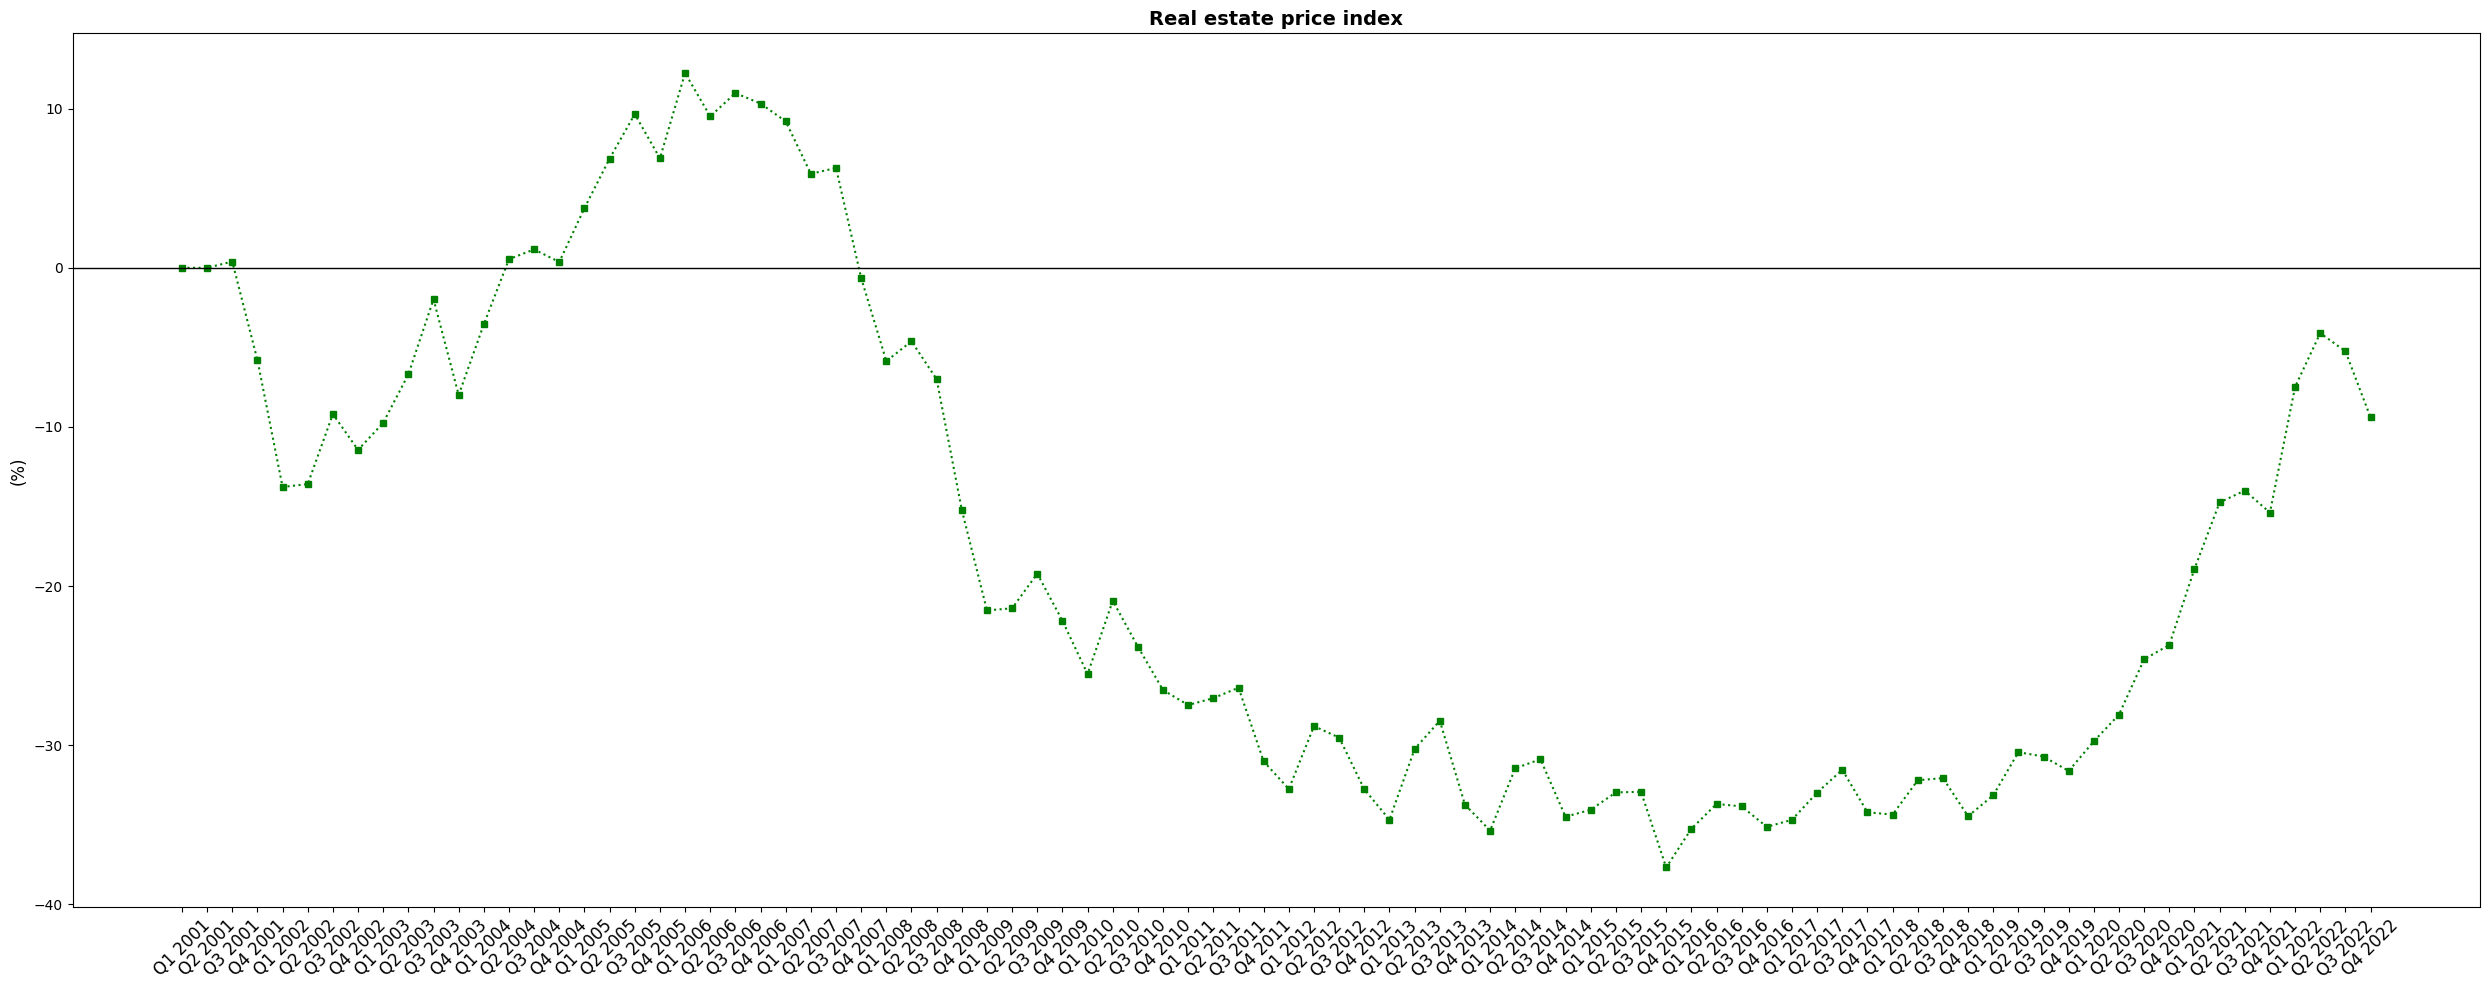

In [66]:
quarters = [f"Q{q} {y}" for y in range(2001, 2023) for q in range(1, 5)]
quarters = quarters[:88]

y = index_global.values
y = y - y[0]

fig, ax = plt.subplots(figsize=(25, 10))
ax.plot(quarters, y, marker='s', markersize=5, color='green', linestyle="dotted")

ax.axhline(0, color='black', linewidth=1)
ax.set_ylabel('(%)', fontsize=12)
ax.set_title('Real estate price index', fontsize=14, weight='bold')
ax.set_xticks(range(len(quarters)))
ax.set_xticklabels(quarters, rotation=45, fontsize=12)
ax.set_ylim()

plt.tight_layout()
plt.show()

In [67]:
def index (data, index_name):
  y = data['log(Last_Year_Sale_Amount/\tFirst_Year_Sale_Amount)']
  design = MS(qr_yr_df['Column'])
  design = design.fit(data)
  X = design.transform(data)
  model = sm.OLS(y, X)
  results = model.fit()
  beta = pd.Series(results.params)[1:]

  beta_tau = beta.iloc[0]
  index = 100 * np.exp(beta - beta_tau)
  index.name = index_name

  return index


In [68]:
index_prop_res = index (prop_index_res, 'Residential Property Index')
index_prop_com = index (prop_index_com, 'Commercial Property Index')
index_prop_vl = index (prop_index_vl, 'Vacant Land Property Index')
index_prop_app = index (prop_index_app, 'Apartement Property Index')
index_prop_in = index (prop_index_in, 'Industrial Property Index')
index_prop_pu = index (prop_index_pu, 'Public Utility Property Index')

In [69]:
index_prop = pd.concat([index_prop_res, index_prop_vl,index_prop_app], axis=1)

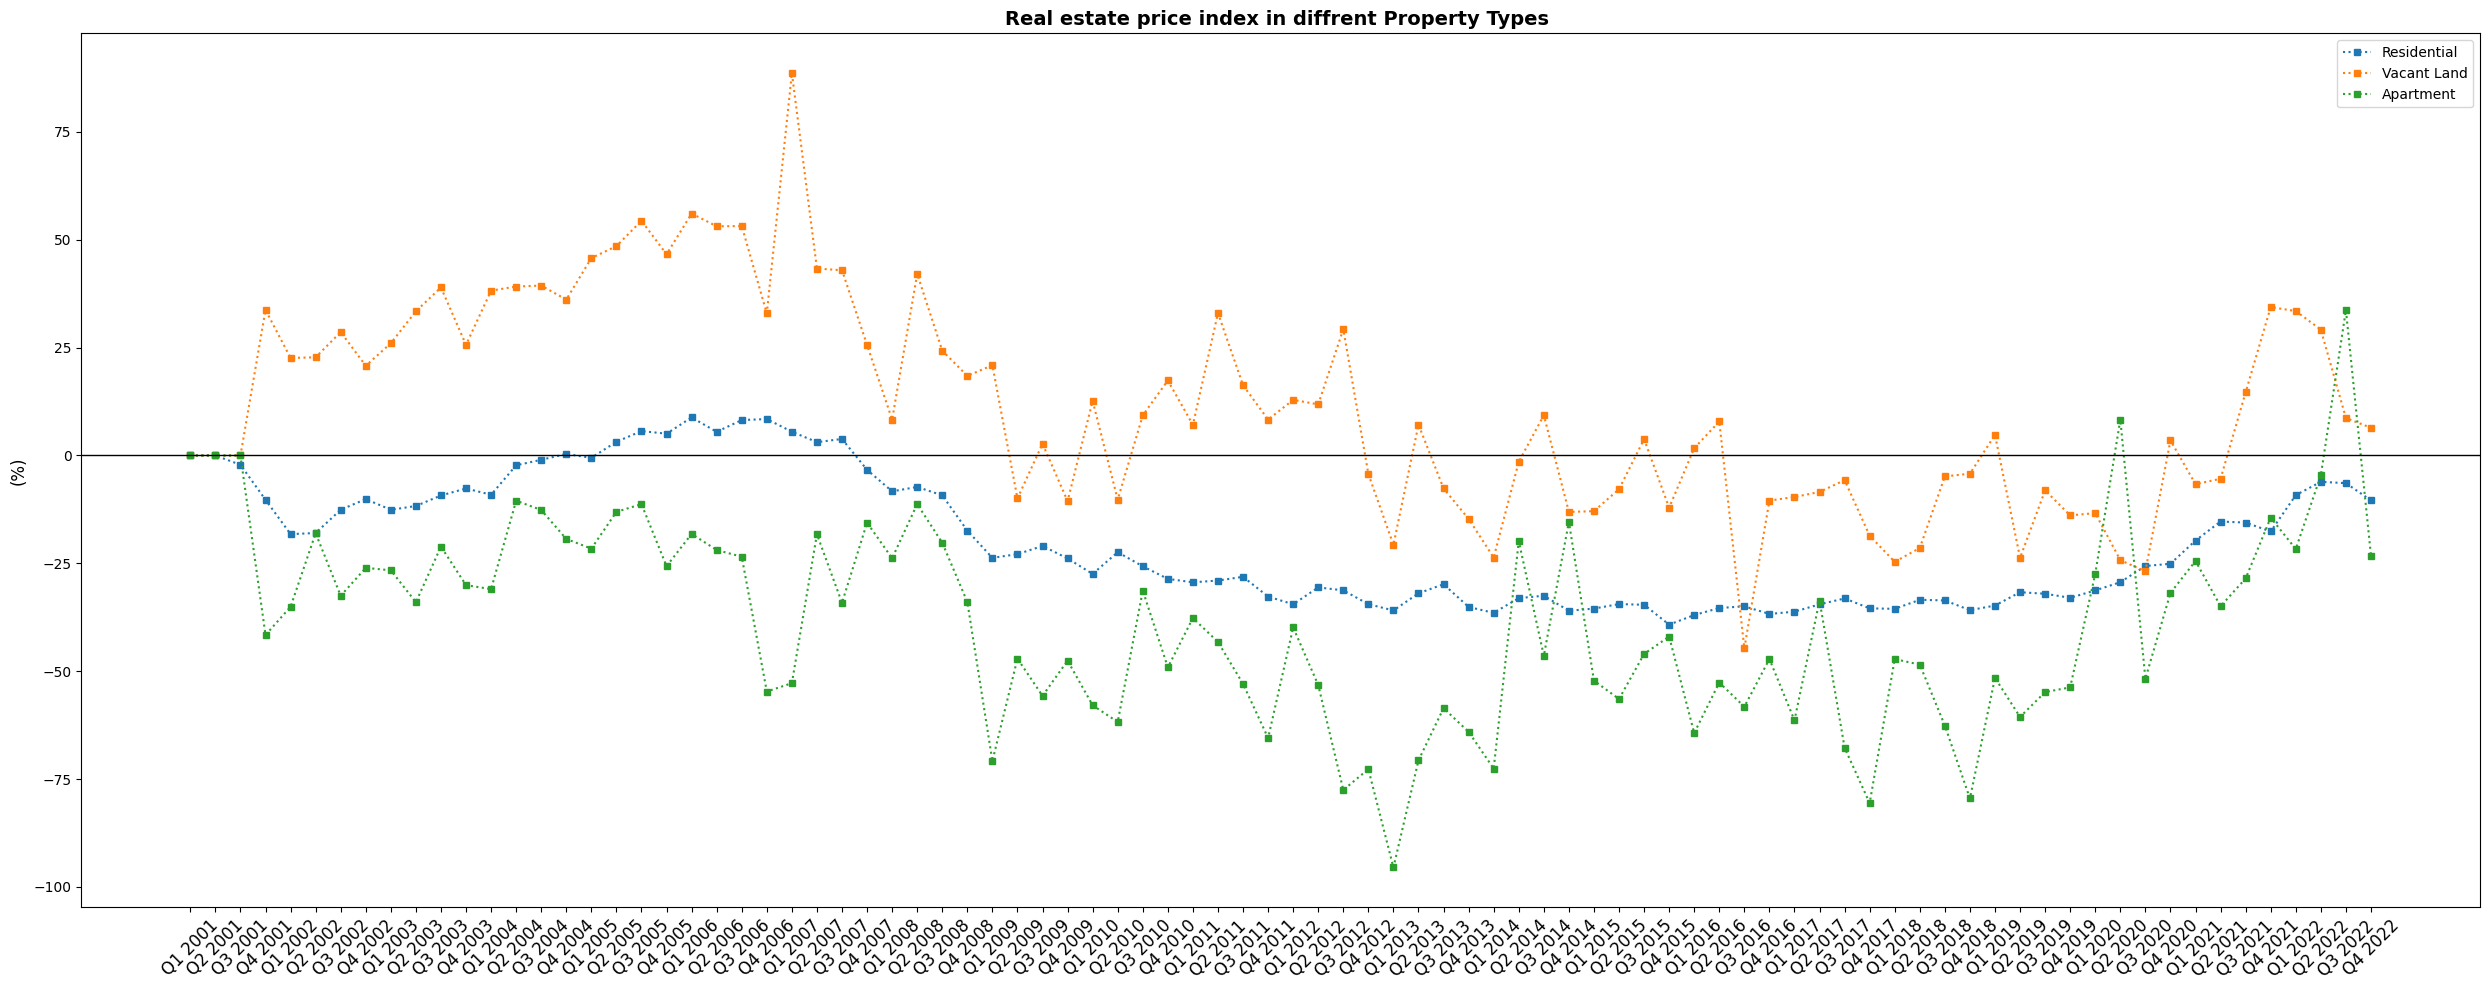

In [70]:
quarters = [f"Q{q} {y}" for y in range(2001, 2023) for q in range(1, 5)]
quarters = quarters[:88]

y = index_prop.values
y = y - y[0]

fig, ax = plt.subplots(figsize=(25, 10))

ax.plot(quarters, y[:, 0], marker='s', markersize=5, linestyle="dotted", label='Residential')
ax.plot(quarters, y[:, 1], marker='s', markersize=5, linestyle="dotted", label='Vacant Land')
ax.plot(quarters, y[:, 2], marker='s', markersize=5, linestyle="dotted", label='Apartment')


ax.axhline(0, color='black', linewidth=1)
ax.set_ylabel('(%)', fontsize=12)
ax.set_title('Real estate price index in diffrent Property Types ', fontsize=14, weight='bold')
ax.set_xticks(range(len(quarters)))
ax.set_xticklabels(quarters, rotation=45, fontsize=12)
ax.set_ylim()

ax.legend()

plt.tight_layout()
plt.show()

# **Forcast the price index in the future**

In [71]:
index_global

,Property Index
2001 Q1,100.000000
2001 Q2,100.000000
2001 Q3,100.391201
2001 Q4,94.203043
2002 Q1,86.229783
...,...
2021 Q4,84.619031
2022 Q1,92.516550
2022 Q2,95.896175
2022 Q3,94.755739


In [72]:
#!pip install prophet --upgrade

In [73]:
df = index_global.copy().reset_index()
df.columns = ['quarter', 'y']

df[['year', 'q']] = df['quarter'].str.extract(r'(\d{4})\s*Q([1-4])')


quarter_end_month = {'1': '03-31', '2': '06-30', '3': '09-30', '4': '12-31'}
df['ds'] = df.apply(lambda row: f"{row['year']}-{quarter_end_month[row['q']]}", axis=1)
df['ds'] = pd.to_datetime(df['ds'])

df = df[['ds', 'y']]


In [75]:
model = Prophet(changepoint_prior_scale=0.05, seasonality_prior_scale=10)
model.fit(df)
future = model.make_future_dataframe(periods=20, freq='Q')
forecast = model.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps0mtrkva/t4bk2lww.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps0mtrkva/69readah.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18444', 'data', 'file=/tmp/tmps0mtrkva/t4bk2lww.json', 'init=/tmp/tmps0mtrkva/69readah.json', 'output', 'file=/tmp/tmp003zrarn/prophet_modelkc0a3bwl/prophet_model-20250421111305.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:13:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:13:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

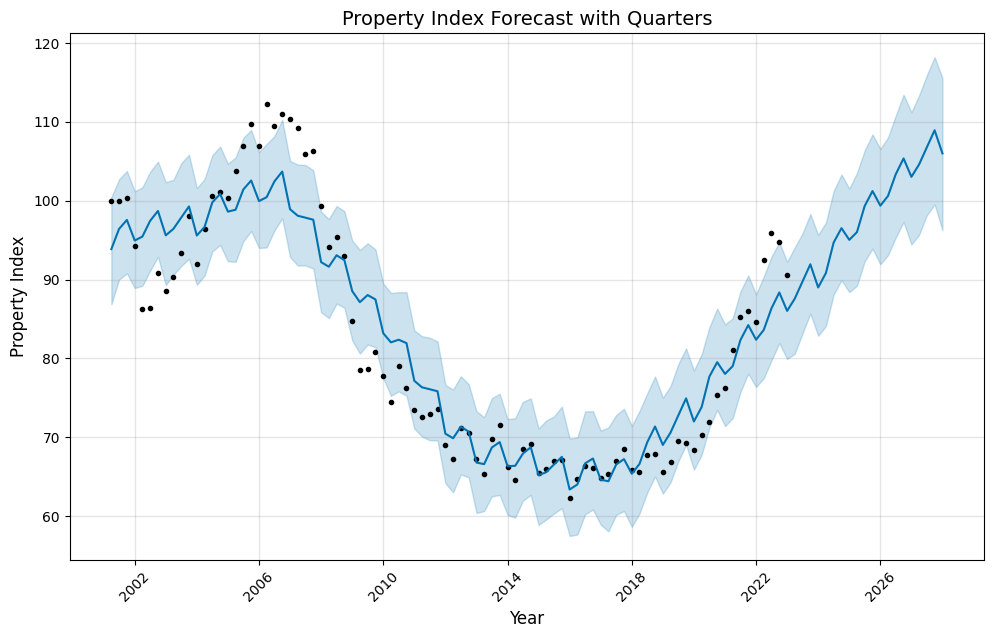

In [76]:
fig = model.plot(forecast)

plt.xticks(rotation=45)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Property Index', fontsize=12)
plt.title('Property Index Forecast with Quarters', fontsize=14)

plt.show()

# **Automate Data transformation for training and Modeling**

In [77]:
years = list(map(str,range(2001,2023)))
quarters = ['Q1','Q2','Q3','Q4']

qr_yr_cl = [f"{yr} {q}" for yr, q in itertools.product(years, quarters)]
RSM_1[qr_yr_cl] = 0

qr_yr_df = pd.DataFrame({
    'Column': qr_yr_cl,
    'Year': [int(c[:4]) for c in qr_yr_cl],
    'Quarter': [int(c[-1]) for c in qr_yr_cl]
})

In [78]:
def transform_data(RSM_data):
  RSM_data['Date Recorded'] = pd.to_datetime(RSM_data['Date Recorded'])
  RSM_data['Year'] = RSM_data['Date Recorded'].dt.year
  RSM_data['Quarter'] = RSM_data['Date Recorded'].dt.quarter
  RSM_data.drop(columns='List Year',inplace=True)

  duplicate_addresses_prop_res = RSM_data[RSM_data.duplicated(subset=['Address','Property Type','Residential Type'], keep=False)]
  property_data = RSM_data[['Address', 'Town','Property Type','Residential Type']].drop_duplicates()

  first_year_data = duplicate_addresses_prop_res[duplicate_addresses_prop_res['Year'] == duplicate_addresses_prop_res.groupby(['Address','Property Type','Residential Type'])['Year'].transform('min')]
  last_year_data = duplicate_addresses_prop_res[duplicate_addresses_prop_res['Year'] == duplicate_addresses_prop_res.groupby(['Address','Property Type','Residential Type'])['Year'].transform('max')]

  first_year_data = first_year_data[['Address', 'Year', 'Sale Amount','Sale_Amount_log','Property Type','Residential Type','Quarter']].rename(columns={'Year': 'First Year', 'Sale Amount': 'First_Year_Sale_Amount','Sale_Amount_log':'First_Year_Sale_Amount_log','Property Type':'Property Type','Residential Type':'Residential Type','Quarter':'First_Year_Quarter'})
  last_year_data = last_year_data[['Address', 'Year', 'Sale Amount','Sale_Amount_log','Property Type','Residential Type','Quarter']].rename(columns={'Year': 'Last Year', 'Sale Amount': 'Last_Year_Sale_Amount','Sale_Amount_log':'Last_Year_Sale_Amount_log','Property Type':'Property Type','Residential Type':'Residential Type','Quarter':'Last_Year_Quarter'})

  merged_data = pd.merge(first_year_data, last_year_data, on=['Address','Property Type','Residential Type'], how='inner')

  RSM = merged_data[merged_data['First Year'] != merged_data['Last Year']]

  RSM_1 = RSM.copy()
  RSM_1 = RSM_1.reset_index()
  RSM_1.drop(columns='index',inplace=True)

  years = list(map(str,range(2001,2023)))
  quarters = ['Q1','Q2','Q3','Q4']

  qr_yr_cl = [f"{yr} {q}" for yr, q in itertools.product(years, quarters)]
  RSM_1[qr_yr_cl] = 0

  qr_yr_df = pd.DataFrame({
      'Column': qr_yr_cl,
      'Year': [int(c[:4]) for c in qr_yr_cl],
      'Quarter': [int(c[-1]) for c in qr_yr_cl]
  })

  for _, row in qr_yr_df.iterrows():
    col, year, quarter = row['Column'], row['Year'], row['Quarter']

    RSM_1.loc[(RSM_1['First Year'] == year) & (RSM_1['First_Year_Quarter'] == quarter), col] = -1
    RSM_1.loc[(RSM_1['Last Year'] == year) & (RSM_1['Last_Year_Quarter'] == quarter), col] = 1

  RSM_1['log(Last_Year_Sale_Amount/	First_Year_Sale_Amount)']=RSM_1['Last_Year_Sale_Amount_log']-RSM_1['First_Year_Sale_Amount_log']

  return RSM_1


In [79]:
RSM_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Personal/Real estate dataset/final_data.csv")

In [80]:
RSM_1 = transform_data(RSM_data)

In [87]:
def index (data, index_name):
  years = list(map(str,range(2001,2023)))
  quarters = ['Q1','Q2','Q3','Q4']

  qr_yr_cl = [f"{yr} {q}" for yr, q in itertools.product(years, quarters)]

  qr_yr_df = pd.DataFrame({
      'Column': qr_yr_cl,
      'Year': [int(c[:4]) for c in qr_yr_cl],
      'Quarter': [int(c[-1]) for c in qr_yr_cl]
  })

  y = data['log(Last_Year_Sale_Amount/\tFirst_Year_Sale_Amount)']
  design = MS(qr_yr_df['Column'])
  design = design.fit(data)
  X = design.transform(data)
  model = sm.OLS(y, X)
  results = model.fit()
  beta = pd.Series(results.params)[1:]

  beta_tau = beta.iloc[0]
  index = 100 * np.exp(beta - beta_tau)
  index.name = index_name

  return index, beta

In [88]:
training_data = RSM_1.copy()

global_index = training_data.drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()

prop_index_res = training_data[training_data['Property Type']=='Residential'].drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()

prop_index_com = training_data[training_data['Property Type']=='Commercial'].drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()

prop_index_vl = training_data[training_data['Property Type']=='Vacant Land'].drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()

prop_index_app = training_data[training_data['Property Type']=='Apartments'].drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()

prop_index_in = training_data[training_data['Property Type']=='Industrial'].drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()

prop_index_pu = training_data[training_data['Property Type']=='Public Utility'].drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()

res_index_co = training_data[training_data['Residential Type']=='Condo'].drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()

res_index_tf = training_data[training_data['Residential Type']=='Two Family'].drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()

res_index_sf = training_data[training_data['Residential Type']=='Single Family'].drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()

res_index_ff = training_data[training_data['Residential Type']=='Four Family'].drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()

res_index_thf = training_data[training_data['Residential Type']=='Three Family'].drop(columns=['Address','First Year','First_Year_Sale_Amount','First_Year_Sale_Amount_log','Property Type','Residential Type','First_Year_Quarter','Last Year','Last_Year_Sale_Amount','Last_Year_Sale_Amount_log','Last_Year_Quarter']).copy()


In [90]:
index_prop_res = index (prop_index_res, 'Residential Property Index')[0]
index_prop_com = index (prop_index_com, 'Commercial Property Index')[0]
index_prop_vl = index (prop_index_vl, 'Vacant Land Property Index')[0]
index_prop_app = index (prop_index_app, 'Apartement Property Index')[0]
index_prop_in = index (prop_index_in, 'Industrial Property Index')[0]
index_prop_pu = index (prop_index_pu, 'Public Utility Property Index')[0]
index_global = index (global_index, 'Global Property index')[0]

In [91]:
beta_prop_res = index (prop_index_res, 'Residential Property Index')[1]
beta_prop_com = index (prop_index_com, 'Commercial Property Index')[1]
beta_prop_vl = index (prop_index_vl, 'Vacant Land Property Index')[1]
beta_prop_app = index (prop_index_app, 'Apartement Property Index')[1]
beta_prop_in = index (prop_index_in, 'Industrial Property Index')[1]
beta_prop_pu = index (prop_index_pu, 'Public Utility Property Index')[1]
beta_global = index (global_index, 'Global Property index')[1]

In [84]:
def forecast(index):
  model = Prophet(changepoint_prior_scale=0.05, seasonality_prior_scale=10)
  model.fit(df)
  future = model.make_future_dataframe(periods=20, freq='Q')
  forecast = model.predict(future)
  return forecast, model

In [85]:
forecast_global = forecast(index_global)[0]
model_global = forecast(index_global)[1]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps0mtrkva/yac9imti.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps0mtrkva/te6vob4e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30280', 'data', 'file=/tmp/tmps0mtrkva/yac9imti.json', 'init=/tmp/tmps0mtrkva/te6vob4e.json', 'output', 'file=/tmp/tmp003zrarn/prophet_model9ycfhxa6/prophet_model-20250421111332.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:13:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:13:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

In [93]:
forecast_prop_res = forecast (index_prop_res)[0]
forecast_prop_com = forecast (index_prop_com)[0]
forecast_prop_vl = forecast (index_prop_vl)[0]
forecast_prop_app = forecast (index_prop_app)[0]
forecast_prop_in = forecast (index_prop_in)[0]
forecast_prop_pu = forecast (index_prop_pu)[0]
forecast_global = forecast (index_global)[0]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps0mtrkva/4y_6zd91.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps0mtrkva/juy0j2re.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2783', 'data', 'file=/tmp/tmps0mtrkva/4y_6zd91.json', 'init=/tmp/tmps0mtrkva/juy0j2re.json', 'output', 'file=/tmp/tmp003zrarn/prophet_modeljmd082b0/prophet_model-20250421111945.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:19:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

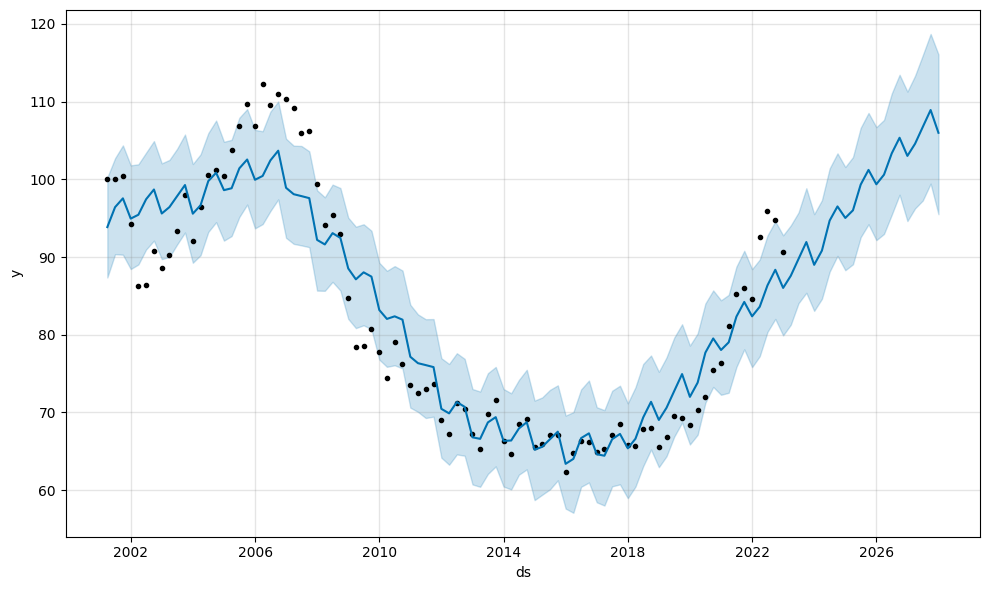

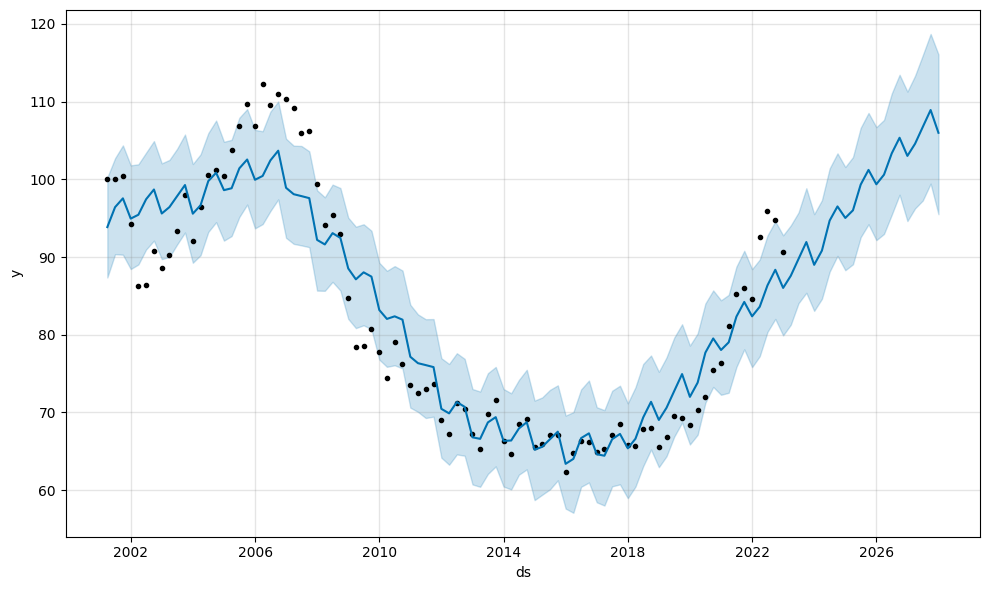

In [86]:
model_global.plot(forecast_global)

In [96]:
index_prop_res.to_excel('index_prop_res.xlsx')
index_prop_com.to_excel('index_prop_com.xlsx')
index_prop_vl.to_excel('index_prop_vl.xlsx')
index_prop_app.to_excel('index_prop_app.xlsx')
index_prop_in.to_excel('index_prop_in.xlsx')
index_prop_pu.to_excel('index_prop_pu.xlsx')
index_global.to_excel('index_global.xlsx')


beta_prop_res.to_excel('beta_prop_res.xlsx')
beta_prop_com.to_excel('beta_prop_com.xlsx')
beta_prop_vl.to_excel('beta_prop_vl.xlsx')
beta_prop_app.to_excel('beta_prop_app.xlsx')
beta_prop_in.to_excel('beta_prop_in.xlsx')
beta_prop_pu.to_excel('beta_prop_pu.xlsx')
beta_global.to_excel('beta_global.xlsx')



forecast_prop_res.to_excel('forecast_prop_res.xlsx')
forecast_prop_com.to_excel('forecast_prop_com.xlsx')
forecast_prop_vl.to_excel('forecast_prop_vl.xlsx')
forecast_prop_app.to_excel('forecast_prop_app.xlsx')
forecast_prop_in.to_excel('forecast_prop_in.xlsx')
forecast_prop_pu.to_excel('forecast_prop_pu.xlsx')
forecast_global.to_excel('forecast_global.xlsx')